## load library

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd

import numpy as np

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

import time

import copy

from konlpy.tag import Twitter 
from collections import Counter 
from wordcloud import WordCloud

## download korean font

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [7]:
import platform

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='NanumBarunGothic')

plt.rc('ytick', labelsize=5)

## official operator list

In [150]:
operlist = ['엑시아','시즈','이프리트','에이야퍄들라','안젤리나','샤이닝','나이팅게일',
            '호시구마','사리아','실버애쉬','프틸롭시스','지마','텍사스','프란카','라플란드',
            '스펙터','블루포이즌','플래티넘','메테오라이트','스카이파이어','메이어','사일런스',
            '와파린','니어','레드','리스캄','크루아상','프로방스','파이어워치','클리프하트',
            '프라마닉스','이스티나','소라','맨티코어','에프이터','아미야','인드라','벌컨',
            '헤이즈','기타노','제시카','메테오','시라유키','스캐빈저','비그나','도베르만',
            '마토이마루','프로스트리프','에스텔','무스','그라벨','로프','미르','퍼퓨머','마더호른',
            '쿠오라','굼','딥컬러','어스스피릿','쇼','쿠리어','가비알','팽','바닐라','플룸','멜란사',
            '카디건','비글','크루스','아드나키엘','라바','히비스커스','안셀','스튜어드','오키드',
            '야토','느와르 코르네','레인저','두린','12F','Castle-3','Lancet-2','새비지','스카디',
            '나이트메어','비헌터','미드나이트','캐터펄트','그라니','첸','스와이어','그레이','포푸카',
            '스팟','마젤란','이그제큐터','버메일','플레임브링어','헬라그','아스테시아','머틀',
            '슈바르츠','글라우쿠스','수수로','실론','듀나','브리즈','에단','모스티마','와이후',
            '메이','바이슨','블레이즈','그레이스롯','엠브리엘','리드','브로카','니엔','아','훔',
            '스노우상트','케오베','레이즈','백파이프','세사','우타게','바이비크','로사','레온하르트',
            '포덴코','압생트','스즈란','에이어스카르페','클릭','폴리닉','아스베스토스','츠키노기',
            '팬텀','샤마르','커터','시데로카','W','위디','엘리시움','THRM-EX','쏜즈','안드레아나',
            '제이','씬','비즈왁스','키아베','유넥티스','플린트','애시드드롭','토미미','수르트',
            '에이프릴','아렌','민트','컨빅션','블레미샤인','아오스타','버블','위슬래시',
            '로즈몬티스','머드락','위스퍼레인','재키','퓨어스트림','마운틴','카프카','파인콘',
            '로빈','아르케토','아이리스','빈스토크','투예','시','사가','우요우','라바 더 퍼거토리',
            'Ash','Tachanka','Blitz','Frost','패신저','토디폰즈','헤비레인','스카디 더 커럽팅 하트',
            '켈시','아카후유','글래디아','카넬리안','키라라','인디고','베나']

In [151]:
len(operlist)

196

In [ ]:
oper_count = {}

for oper in operlist:
    
    oper_count[oper] = 0

## load chrome driver

In [ ]:
#because colab must use headless mode to crawl,

#recommend to use local environment (e.g. jupyter lab)

driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://cafe.naver.com/arknightskor')

In [ ]:
# to crawl naver cafe, need switch_to.frame

driver.switch_to.frame('cafe_main')

## define review crawling data function

In [ ]:
def crawling_data(operlist,oper_count,vote,voter_list,reason_list):
    
    string_list = []
    
    for string in vote:

        string_list.append(string.get_text())


    for string in string_list:

        oper_string = ''

        a = string.split('\n')

        voter,oper,reason = a[1].strip(), a[2].strip(), a[3].strip()

        if voter in voter_list:

            pass

        else:

            try:

                oper_count[oper] += 1

                voter_list.append(voter)

                if oper in ['W']:

                    reason_list.append(a)

            except:

                if reason in operlist:

                    oper_count[reason] += 1

                    voter_list.append(voter)

                    if reason == 'W':

                        reason_list.append(a)

                else:

                    if '이유' in oper:

                        ind = oper.index('이유')

                        oper = oper[:ind].strip()
                        reason = oper[ind:].strip()

                    else:

                        pass
                    
                    if '오퍼레이터' in oper:
                        
                        oper = oper.replace('오퍼레이터:','').replace('오퍼레이터','').strip()
                        
                    else:
                        
                        pass
                    
                    if '♥' in oper:
                        
                        oper = oper.replace('♥','').replace('♥','').strip()

                    try:

                        oper_count[oper] += 1

                        voter_list.append(voter)

                        if oper in ['W']:

                            reason_list.append(a)

                    except:

                        for char in oper:

                            oper_string += char

                            if oper_string == '스카디':

                                if oper[:12] == '스카디 더 커럽팅 하트':

                                    oper_count['스카디 더 커럽팅 하트'] += 1
                                    
                                    #reason_list.append(a)

                                else:

                                    oper_count['스카디'] += 1

                                voter_list.append(voter)
                                break

                            elif oper_string == '라바':

                                if oper[:9] == '라바 더 퍼거토리':

                                    oper_count['라바 더 퍼거토리'] += 1

                                else:

                                    oper_count['라바'] += 1

                                voter_list.append(voter)
                                break
                                
                            elif oper_string == '아':

                                if oper[:3] == '아미야':
                                    
                                    oper_count['아미야'] += 1
                                    
                                    #reason_list.append(a)
                                
                                elif oper[:5] == '아드나키엘':
                                    
                                    oper_count['아드나키엘'] += 1
                                
                                elif oper[:4] == '아르케토':
                                    
                                    oper_count['아르케토'] += 1
                                
                                elif oper[:5] == '아스테시아':
                                    
                                    oper_count['아스테시아'] += 1
                                
                                else:
                                    
                                    oper_count['아'] += 1
                                    
                                    #reason_list.append(a)

                            elif oper_string in operlist:

                                oper_count[oper_string] += 1

                                voter_list.append(voter)

                                if oper_string in ['W']:

                                    reason_list.append(a)

                                break
                            
    
    return oper_count,voter_list,reason_list

## crawling data for 29page

In [ ]:
reason_list = []
voter_list = []

ind = 1

page = True

while 1:
    
    ind += 1
    
    try:
        
        html = driver.page_source
        soup = BeautifulSoup(html,'html.parser')
        vote = soup.find_all('div',class_='comment_box')
        
        oper_count,voter_list,reason_list = crawling_data(operlist,oper_count,vote,voter_list,reason_list)
                
        xpath = '//*[@id="app"]/div/div/div[2]/div[2]/div[4]/div[2]/button[{}]'.format(ind)
        
        driver.find_element_by_xpath(xpath).click()
        time.sleep(2)
        
        if page:
            
            if ind == 11:
            
                page = False

                ind = 3
        
        else:
            
            if ind == 13:
                
                ind = 3

    except:
        
        print('error')
        break

## create dataframe

In [ ]:
count_df = pd.DataFrame(oper_count.values(),index=oper_count.keys(),columns = ['count'])

count_df.to_csv('count.csv',encoding='cp949')

## load dataframe to use colab

In [3]:
count_df = pd.read_csv('/content/count.csv',encoding='cp949')

count_df_sort = count_df.sort_values(by='count',ascending=False)

count_df_sort = count_df_sort.rename(columns = {"Unnamed: 0":'operator'})

In [152]:
count_df_sort.head(50)

,operator,count
155,수르트,357
145,쏜즈,145
188,스카디 더 커럽팅 하트,140
165,머드락,120
9,실버애쉬,118
100,머틀,103
189,켈시,88
83,스카디,83
141,W,80
0,엑시아,75


## visualize top50 operator

In [5]:
top50 = count_df_sort.head(50)

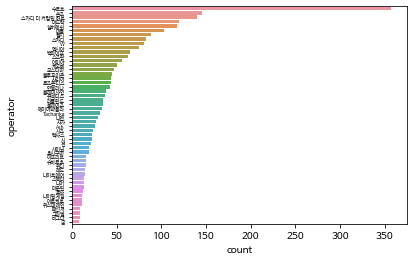

In [8]:
sns.barplot(data = top50, x='count', y='operator')
plt.savefig('top50.png',dpi=300)

## cleansing review data

In [ ]:
reason_list2 = []
reason_list3 = []

for reason in reason_list:
    
    reason_list2.append(reason[2])
    reason_list3.append(reason[3])

In [ ]:
new_reason_list2 = []

for reason in reason_list2:
    
    reason = reason.replace('W','').strip()  #operator name
    
    if reason != '':
        
        new_reason_list2.append(reason)

In [ ]:
new_reason_list3 = []

for reason in reason_list3:
    
    if '이유' in reason:
        
        new_reason_list3.append(reason)

In [ ]:
len(new_reason_list2)

In [ ]:
len(new_reason_list3)

In [ ]:
new_reason_list2.extend(new_reason_list3)

## cleaned review data

In [56]:
reason_list1 = ['죄다 태워서 밀어버리는 무지성 🔥 도저.한우 무엇ㅋㅋㅋㅋ',
 '를 설명해야 되겠습니까?',
 '얘 없었으면 전 멍청해서 맵 못 깼음...',
 '강함',
 '보고 게임 시작함. 성격이랑 목소리가 좋음',
 '이친구 없으면 내 지능이 반으로 감소함대충 협약으로치면 5점정도 차이',
 '레바테인!',
 '그녀는 신이야~',
 '성능캐',
 '게임이 편해졌어요',
 '하나면 모든맵이 다 깨짐!!!',
 '당신의 인권을 보장해줍니다',
 '원래도 고우신데 이번에 나온스킨은 미친듯이 고우심',
 '모두에게 공평한 레바테인',
 '이쁘고, 애들 잘구워주잖아요?!         편성에서 빠진적이 없는 것 같네요         (근데 솔직히  말고 레바테인만 있어도 ㅎ....)',
 '어려운 보스 무지성 숙청 가능. 아름다우심.\xa0눈나 나죽어…',
 '신의 영역을 나누었다',
 '는..미친듯한 딜 데미지와 이쁨이지요',
 '안되던거 전부 다 해줘서(?) 그저 최고!',
 '는...그저 ...그녀는 스킨마저 가졌어!',
 '시간과 능지가 부족하여 어려운 이벤트들 클리어에 난항을 겪는 경우가 많은데 그때마다 빛처럼 등장하여 해결해줌으로써 무사히 이벤트를 진행하게 해준 1등 공신이 아니였을까하며 뽑았습니다.(feat. 예쁜 외모)',
 '답이 없는 상황을 해결해줌',
 '레바테인! 레바테인! 레바테인!',
 '-여신님',
 '교환권으로 데려왔는데 뉴비의 막힌 길을 뚫어줌 예쁨 스킨도 나왔음 최고다 짱!!!!!!!!!!!!',
 '레바테인',
 '아니 저 슴가를 보고도 다른 애를 찍는다는 소리가 나옴? 딱 거유이면서도 너무 크지는 않은 꼴림의 최적화 그리고 저 허리와 허벅지의 매끈한 라인 그야말로 여신',
 '신',
 '는 신이야! 자타공인 명방 여신, 핵폭탄  사랑합니다',
 '가 필요할까요 ㅋㅋ 최강인데',
 '의 파이어 펀치가 캐리 많이 해줘서',
 '부족한 나의 능지를 채워줌...',
 '나올때마다 게임을 터트려주셔서 안그래도 없던 뇌주름이 다 펴졌어요..',
 '그녀는 신이야....!',
 '명방에서 가장 효율적으로 강한 적을 상대할 수 있는 오퍼레이터라고 생각해요.그리고 아마 강한적을 상대할때 가장 우선적으로 편성한 오퍼레이터로 확신합니다.컨셉도 가장 재미있구요.',
 '새로 나온 스킨이 너무 예뻐서 + 선택지에 케오베가 없어서',
 '외모는 두말할거없고 안데리고가는 곳이 없을정도... 게다가 이번 스킨도 나왔으니 이건 못참죠',
 '그녀는 신이야!!',
 '내 첫 현질을 가져갔어.. 헤으응..',
 '레버테인 누나 나죽어 진짜죽어!',
 '외모도 이쁘고 성능도 확실하고 얼마나 완벽합니까 눈나 나 죽는다구~~',
 '그녀는 신이야!!!',
 '만능 해결사',
 '라는 이름답게 스킬들도 화려하고 시원시원 함, 다른 어떤 캐릭터를 뽑았을 때보다  뽑았을 때가 제일 기분 좋았음',
 '너무 이쁘다..그냥 너무 이쁨',
 '게임을 하고 싶게 만드는 만능캐',
 '공중빼고 다 잡음',
 '(수류탄)',
 '여신님',
 '그녀의 강력한 스킬을 보면 가슴이 떨려요, 이게 바로 사랑이겠죠!!',
 '한우 맛있게 잘 구워줄거 같음',
 '10만원들여 뽑고, 한번도 후회안함(소고기 먹고싶은건 안비밀)',
 '말이 필요합니까?',
 '그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!  그녀는 신이야!',
 '보고 명방 시작한지 어언 반년이나 되었읍니다... 이제 명방없인 살 수 없는 몸이 되었다지요..',
 '이쁘고 많이쓰여서',
 '최강',
 '예쁜 외모와 함께 엄청난 성능으로 적과 박사들 마음을 불사르기 때문입니다',
 '- 가 필요있나요 ㅋ',
 '외모에 성능에 미친오퍼가 아닌가',
 '초보자들이 쓰기 쉬운 캐릭터 보스를 쉽게 잡을수있고 누구나 쉽게 쓸수 있다',
 '말 하 지 않 아 도 알 아 요~         말해 뭐해, 모두의 애정캐가 아닐까?         비주얼,성능 팔방미인           1등 캐릭터 ~',
 '적.페.',
 '일러며 성능이며... 무엇하나 모자람이없음',
 '게임의 난이도를 영향을 미치는 절대적인 오퍼레이터며 필수로 가지고 있어야할  오퍼레이터 다.  출시 이전 클리어 하기 힘든 작전들을  한명이 더해지며 클리어가 가능했다. 일부 사람들은 게임의 난이도를 낮추는게 재미없다고 할 정도로 강력한 성능을 자랑한다.',
 '붉은색은 3배 강하다',
 '개인적으로 도전하기 힘들거나 불가능한 맵 공략에 앞장서서 클리어에 헌신하고 스킨까지 나오면서 그녀의 매력을 좀 더 뽑내게 되어 그녀에게 투표합니다♡',
 '그녀는 신이야!',
 '딜량이 높고 외모도 좋고 대사도 좋고 트리플 합격이라서 가장 좋습니다',
 '최고의 죽창',
 '첫 협약에서 친구 도움많이받고 6성 선택권으로 데려와서',
 '최강이고 예쁜 누님',
 '순간딜량 미쳤어요..  없었으면 못 잡았을 보스들이 한둘이 아님',
 '앞에선 모든 적이 평등하다 를 가지고 있으면 모든 독타는 평등하다',
 '빨간색상이 잘어울리는 그리고 성능도 뛰어난 오퍼레이터',
 '성능좋고 외모도 좋고더 말이 필요한가?',
 '그녀는 유일신이니까',
 '모든 보스들이  앞에서 평등하고 게임의 난이도를 확 낮춰주며 어떤 맵이든 만 있으면 쉽게 계산이 서기때문이다예쁜거는 덤이고',
 '그녀는 신이야',
 '목소리, 대사, 딜량 오졌습니다',
 '사기적인 성능',
 '레바테인!',
 '폭딜 최강 +여캐 이쁨',
 '아무리 머리를 굴려도 답이 안 나올 때 를 배치하면 앵간하면 다 깨진다',
 '이쁘고 강하다',
 '레바테인! 레바테인! 레바테인!',
 '2021가장 많은 기대를 받은 오퍼 많은 사람들이 다른 오퍼들은 걸러서라도 이 오퍼레이터 만큼은 뽑겠다고 존버했으며 뽑기 전과 후가 나뉠정도로 압도적인 성능으로 기대에 부흥해줬으며 외모 성능 인지도 어느하나 빠질것없는 특히 2021 어떤 오퍼레이터를 가장 기다리고 기대했냐고 말하면 라고 할수 있음',
 '이쁜 일러스트와 이쁜 성능',
 '수카콜라',
 '이번 스킨이 증명해줌',
 '예쁘고 멋지고 능력도 간지나고 스토리도 좋아서!',
 '딜링의 최고봉',
 '이번 스킨 너무 이쁘게 뽑혔어요',
 '당근빠따죠',
 '이번년도 10월에 시작한 저와 언제나 함께해준 고맙고 소중한 첫 6성 오퍼레이터 입니다.',
 '든든한 국밥캐릭 모두에게 사랑받는 만큼 저한테도 최애캐릭 항상 팀 구성에 함께하고있죱',
 '모자란 나의 지능을 레바테인으로 채워줌',
 '그녀는 신이야',
 '사기',
 '외모면 외모 성능이면 성능 뭐하나 빠지지 않는 팔방미인 없었으면 겜 접었을듯',
 '는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!는 신이야!',
 '이쁘고 쌔다 다른  필요없다!',
 '아름다운 강력한 데미지 더 이상 말이 필요한가',
 '얘땜에 멍청해져서 이제 다른겜을 할 수가 없음',
 '겁 나 이 쁩 니 다',
 '예뻐요',
 '중섭에 나올 때부터 일러보고 반했음 근데 성능은 더 예뻐!! 오늘 나온 스킨도 사줬습니다~',
 '만능 해결사... 딜 원탑...♡',
 '스토리, 협약, 에피소드 빠지지 않고 불철주야 독타들을 위해 힘쓴 우리 쨩을 2021년 올해의 오퍼레이터로 추천합니다.',
 '외모성능범용성 뭐하나 부족함이 없는 오퍼이기때문',
 '다들... 알잖아~?',
 '얼어 죽어도 아이스크림! 최강의 딜러! 그리고 이쁨!',
 '오퍼레이터 \xa0예쁨',
 '패왕',
 '무지성 플레이',
 '로도스 전술핵',
 '넌 이미 D져있다..',
 '오퍼레이터이뻐',
 '무지성독타의 희망',
 '좀 무섭다 싶은 적은 가 해결해줌',
 '3스 앞에선 모든 몹이 한우처럼 살살 녹으니깐',
 '가 없었으면 지금까지 못왔을듯',
 '명방은  전 후 난이도 차이가 엄청나게 납니다',
 '덕에 클리어한 맵이 몇갠지 ㅎㅎ',
 '앞에선 모두 공평하지',
 '압도적인 딜링으로 메타를 바꿨기때문이다',
 '위기가 있을때 마다 무지성 폭격으로 나를 구원해줌',
 '성능캐에 예쁜데다 이번에는 스킨도 받아서 더 좋아졌습니다',
 '그녀는 신이야!',
 '이쁘고 짱짱 쎔',
 '2, 3스킬모두 유용하게쓰이고 어떻게하면 재밌고 잘활용할수있을까 하고 생각하게 해준 애정캐입니다🌹',
 '언제나 항상 덱에 들어있는 애캐. 없으면 서운함. 빠른 순삭 가능하게 하는 갓티어',
 '매력적인 오퍼',
 '무과금 유저였던 내가 를 뽑기위해 과금을 했다. 그녀는 지갑도둑☆~',
 '얻고싶어...',
 '신이니까',
 '가 필요한가?',
 '무지성 레바테인',
 '성능 외모 다 가진 로도스 핵폭탄심지어 이번 스킨도 이쁘게 나옴',
 '뽑기 준비해서 200연 뽑기정도 준비했는데 단차 한번만에 나와주셔서 애정캐 1위 등극',
 '못 써본 사람은 있어도 한 번만 써본 사람은 없다',
 '좋아하는 성우가 연기했고 모든 전장에서 맹활약을 해주니까.',
 '원래는 아렌 할려고 했는데, 그래도 항상 뒤를 봐주던 건 여서… 사진에 있는 후보만 뽑을 수 있는 건지는 모르겠지만…. 아렌도 최고였다. 내 첫번째 2정예',
 '그녀는 신이야!!!',
 '오퍼레이터 외모와 성능 두가지 전부 1티어하루 한번 꼭 접속하게 해주는 최고의 오퍼레이터!!',
 '강함과 아름다움을 겸비한 최고의 오퍼',
 '최고존엄 캐리머신',
 '독타를 위해 희생하니까',
 '무지성의 극치....',
 '체강!',
 '예쁘고 데미지도 잘 나와서 애용함',
 '명방 치트키',
 '붉은머리+성능 적폐= 극호',
 '무지성 레바테인 펀치면 대부분의 상황을 해결해주는 도라에몽같은 존재니까.이번에 스킨도 나와서 넘무좋아 ^^',
 '가 나타나기 전과 후의 패러다임이 바뀜.',
 '역시',
 '부족한 지능을 채워줌',
 '는 여러 방면에 정말 너무 매력적인 캐릭터이기때문이다.1. 외모 -  캐릭 자체가 어디에 내놓아도 절대 밀리지않을 미소녀의 글래머스러운 몸매 (글쓴이 추정E컵 추정)  162cm의 생각보다 아담하고 귀엽지만 비율좋아서 모델 스타일이며 화려하고 수려한 적발의 자색안이 너무 매력적이다.내가 색중 빨간색과 검정색 정말 좋아하기에 색적인 부분에서도 너무 만족! 애시당초 검정과 빨간색의 조합은 그냥 끝이다.2. 성능 - 의 3스킬과 특성의 조합은 말이 필요없다 1저지라도 엄청난 데미지는 명방 캐릭터들중 당연 독보적이다. 스킬을 쓸때 그 멋있는 이펙트들은 덤!! 도전정신으로 플레이하는 플레이어들을 제외하면 어디에나 안쓸가 없다고 생각한다.,3. 설정 - 북유럽 신화의 최강 중 하나 ""라는 이름이 무색하지않게 너무 이름과 잘맞는 이미지와 괴랄함을 가지고 있다. 명방에서는 너무나도 매력적인 어여쁜 미소녀인점은 갭모에를 유발시킨다고 생각한다. (그냥 이름만 같은거겠지만)그리고 결핍성 기억 상실증이라는 설정은 너무 슲프지만서도 충분히 강해도 지켜주고싶은 보호본능을 자극한다.그래서 아이스크림을 마구 사주고싶어지는 기분이다. (이부분도 귀여운 반적 매력 포인트라고 생각한다) 본인도 자기가 필요해서 곁에있는게 아니라 원해서 있다는 대사는 더욱 보호본능의 의지를 고조시킨다.4. 기타 설정 - 일단 성우는 호리에 유이님으로 대표작으론 도그 데이즈의 밀피오레 피리아노 비스코 그리고 모노가타리 시리즈의 하네카와 츠바사가 있다. 아주 경력이 오래된 베테랑 답게  역활으로서도 능숙하고 매력있게 친숙한 대표작 캐릭터들의 목소리가 들리기도해서 애정이 더 가기도 한다.일러스트레이터는 "ASK"님으로 내가 소녀전선을 하던 시절의 최애캐 중에 하나였던 밤의 여왕이라고 불렸던 OTs-14를그리신 분이기도하다. 개인적으로 캐릭이나 그림체로나 취향에 너무 잘 맞는것같아서 좋아하고 더 많은 캐릭이 나왔으면 한다. 만세!',
 '강렬한 외모와 폭딜이번에 나온 신스킨도 넘나 예쁘구 섹시하구 너무 귀엽구 바로 구매 장착 빠른 프로필',
 '위기협약 너무 힘들어서 못 깨다가 가 나와주어 훈장작까지 성공했습니다',
 '이쁘고 성능도 좋음',
 '나도 아이스크림이 좋아',
 '레바테인!',
 '뇌가 편해지는 최고존엄',
 '이 게임은 가 나오기 전과 후로 지성과 무지성 게임으로 바뀌어버렸다 외쳐! 무지성  만쉐이~~',
 '최고의 적폐 딜러',
 '게임하면서 없이 하는 독타는 없다.',
 '강려크한 딜의 짜릿함!!! 수르크 누나 사랑해!!!',
 '언제나 든든한 마딜오퍼에 최고의 보스암살자이자 예쁜 눈나',
 '화끈한 여신! 그녀 앞에서는 모든게 재가 되버린다!!',
 '올해는 의 해이다',
 '기본도 이쁜데 스킨도 이쁘게 잘 나오고 성능도 좋아서 선정했습니다.',
 '여신님 채고',
 '모든 적들을 평등하게 갈아주셔서',
 '말이 필요한가? 실배애쉬와 나란히 하는 최고의 오퍼. 실버애쉬가 최고가 아닌 는 남캐이기 때문.',
 '헤으응...눈나...',
 '강한 딜, 3스킬의 생존력, 매력적인 외모와 목소리 그냥 다 원탑입니다 ㅎㅎ',
 '그녀는 신이야!',
 '3스 딜을 사랑합니다',
 '패키지샀어요',
 '그녀 하나면 만능!',
 '가필요함? 다갖췄음',
 '당연하니까',
 '비주얼도 탑급인데 성능도 사기. 안 쓸 수도 없고, 덱에 들어가있으면 보이는 것만으로도 좋음. 심지어 스킨도 예뻐;;',
 '얘가 없었으면 손도 못 댔을 훈장이 몇 개인지...  덕분에 명일방주 이벤트와 위기협약마다 훈장 모으고 클리어하는 보람으로 게임을 즐기는 보람을 느낄 수 있었습니다 ㅎㅎ 물론 외모는 덤',
 '오퍼레이터  그녀는 신.이.야',
 '여신',
 '올해 모든 맵을 종말히켜주심',
 '레바테인이면 모든게 끝나는 마법',
 '박사의 부족한 지능에도 불구하고 이 게임을 계속 클리어 하게 해줌',
 '모든게 완벽한 오퍼',
 '모든 스테이지를 뚫어주는 해결사기 때문',
 '제가 힘들어 하던 곳은 항상 수트트 덕분에 수월하게 클리어 했습니다. 가 없었으면 제 실력으론 못깼을 곳이 수두룩 했을겁니다.협약이나 하드제약 같은걸로 를 못쓰게되면 얼마나 힘들던지 정말 에 많이 의지하는걸 느끼네요. 그래서인지 용문폐가 부족해 오퍼레이터들 성장을 잘 못시켜준 저도 만은 만렙을 찍어둔 상태입니다.성능뿐만 아니라 일러스트도 수려하고 SD모션도 예뻐서 더욱 애정이 갑니다. 오늘 고대하던 의 스킨도 나와서 매우 만족스럽습니다.가장 힘들고 어려운 곳에서도 항상 박사님들에게 큰 도움이 되는 를 추천합니다.',
 '각종 이벤트에 무지성 클리어가 가능하게 해주는 여신',
 '능지를 박살낼 정도의 성능',
 '충전식 수류탄',
 '아직 없어서 더더더 끌려요!!  뽑을수 있게 이벤트 제발 부탁드려요!!!',
 '게임을 재밌게 즐길수 있도록 도와줬고 예쁘잖아',
 'ㅡㅡㅡㅡㅡ무지성 콰콰오카ㅘㅋ옼앜와쾅 메타의 선구주자',
 '/무결점 평 생 함 께 해',
 '적을 좌악좌악 몰살시킴. 화끈한 공격과 성격(?) 최고',
 '한번 사용해보면 뺄수가 없어요 강력한 녀석이 나올 수록 빛을 발하는 ! 최고의 오퍼에요',
 '캐스터들을 다 실직시켜버린 예쁜 가드... 근데 나는 없엉',
 '뽑은 뒤 삶의 질이 달라졌다',
 '난 깆고있지 않은데 성능은 좋음 ㅠㅠ...',
 '외모가 곧 성능!',
 '자신의 덱이 지닌 한계를 뛰어넘어서 그판을 이길수있게해줌. 데우스급.수없찐보다 수있찐이 낫잖아요.',
 '를 물어보는 건 실례야',
 '머리를 쓰지 않아도 어려운 스테이지를 깨게 해줌',
 '눈나 나죽어',
 '한썹 출시전부터 사람들이 뽑아야 한다고 외치던 를 가장 강하게 체감 할 수 있었기 때문에..',
 '결국 막힐때는 가 답임',
 '이번스킨이 잘나와서',
 '케릭터가 예쁘기도 하고 왠간한 보스들은 단신으로 조지는 미친 파괴력',
 '성능과 외모가 너무 제 취향저격임',
 '캐릭터가 성능이 엄청 좋아서 많은 독타들을 무지성으로 만들었으니까요!',
 '강력, 간지, 이쁨',
 '나의 부족한 능지를 채워주는 여신님임',
 '그녀가 지나간 곳에 ‘’는 없다.',
 '내 멍청한 뇌로도 보스를 잡게해줬어...',
 '이쁘지 강하지 안 쓸 가 전혀 없습니다! 심지어 이번에 스킨도 나왔지. 여러분 지르십시오.',
 '외모도 아름답고 성능은 더욱 아름답다.',
 '성능이 좋다.',
 '이쁘고 쌔고',
 '무지성',
 '첫번째 내려찍으면 적들이 혼란스러워지고 두번째 내려찍으면 적들이 사라지고세번째 내려찍으면 미션이 성공한다',
 '예뻐!!!!!!!!!!!!',
 '섹시 도발 딜찍누',
 '무지성으로 만들어줌',
 '다들 아실거임 ㅇㅇ',
 '이쁘지, 세지, 얘 뽑느라 지갑 다 털렸지 ㅠ',
 '모든 것을 다 갖춘 눈나',
 '날아다니는 적 말고는 앞에 모든 적이 평등함ㅋㅋㅋ 다 갈아마셔버림',
 'SensibleUniqueReputationalTacticalElysium',
 '강력한 불의 힘을 쓰고 굴하지 않으며 자주 보스들과 함께 싸웁니다. 최애 상대방들을 도와주는 도움지원 캐릭터 예쁘고 상냥하고 파워불입니다.  짱! 달당이 짱!',
 '배너에 이쁜누님이 있으면 좋겠음고기도 한번에 세줄씩 구워주시겠지',
 '불합리한 전황에서 꺼내서 쓰면 참 좋음',
 '능지가 약한 내가 아직도 이 게임을 하면서 뇌가 터져 폭사하지 않게 해준 전술핵병기',
 '예쁜가? O범용성이 뛰어난가? O딜이 좋은가? O몸이 튼튼한가? O',
 '남신(실버애쉬)는 오픈때부터 있었고 여신()는 올해 강림했기 떄문에 2021년 올해의 오퍼레이터!!',
 '1 여캐2 이쁨3 강함더이상의 설명이 必要韓紙?',
 '이쁘고 성능케 이거 두가지 만족하는거 흔치않다',
 '뇌 없는 나를 위해 보스를 잡아준다!',
 '누가 뭐라해도 올해 최고 최강의 오퍼. 없는 독타가 어디있습니까~협약때  한번이라도 안쓴사람 어디있습니까~무지성 플레이의 최고',
 '여기 적으면 픽업에서 나와주실까 해서요...지금까지 60연 모스티마만 나왔어요...',
 '화려하고 강력한 스킬셋으로, 스테이지에 막혀 힘들어하는 초심자들을 위한 치트',
 '킹오브 적폐',
 '독타 아죠씨들의 비밀 핵무기~',
 '를 참아? 참냐고!압도적 누킹으로 찍어누르는 강력함에 안반할 수가 읎다',
 '박사 능지 치료제',
 '이건 야 적을 다 죽여',
 '오퍼레이터 명일방주 최고존엄 강력크하기 때문에 외모도 이쁨',
 '그저 갓인데 가 필요함?',
 '거대하고 뜨거운 여성 못참지',
 '편성할때 항상 들어감',
 '빠지면 허전할정도로 빠지는 곳이 없음. 내 꿈속도 포함',
 '좀 모자란 스펙으로 멤버를 짜도 12번째 칸에  넣으면 부족한 부분 한 방에 해결됨.',
 '무지성 쓰로잉 쌉가능',
 '그냥 예뻐..♡',
 '“뭐든지 바로 왜냐고 묻는 녀석이 가장 짜증 나. 다들, 그렇지 않기를 바라. 나 혼자로 충분해.”“레바테인!”',
 '그녀 앞에선 누구든지 평등하다',
 '세상에 70억명의  팬이 있다면, 나는 그들 중 한명일 것이다.세상에 1억명의  팬이 있다면, 나 또한 그들 중 한명일 것이다.세상에 천 만명의  팬이 있다면, 나는 여전히 그들 중 한명일 것이다.세상에 백 명의  팬이 있다면, 나는 아직도 그들 중 한명일 것이다.세상에 한 명의  팬이 있다면, 그 사람은 아마도 나일 것이다.세상에 단 한 명의  팬도 없다면, 나는 그제서야 이 세상에 없는 것이다., 나의 사랑., 나의 빛., 나의 어둠., 나의 삶., 나의 기쁨., 나의 슬픔., 나의 고통., 나의 안식., 나의 영혼., 나.',
 '올해 봄 등장해서 이번 이벤트 스킨으로 마무리까지.. 썰엇다',
 '처음 현질해서 얻은 캐릭이라!',
 '어딘지 처연하고 가련함. 일러퀄이 어마어마함. 스스로를 불태우는 컨셉이 이름과 어울림.',
 '뉴비인 나에겐 아직 가지지 못한 그녀가 가장 아름답다',
 '고난이도 전문 해결사 / 내 탈모를 지켜줌',
 '게임 해본사람이면 다알지 뭣이중헌디',
 '딜이 너무시원함',
 '이번 스킨으로 더욱 이뻐짐 어디에서도 빠지지 않고 1인분 이상해주는 만능 !',
 '이뻐요.... 없는 오퍼레이턴데 스킨부터 샀어...',
 '그는 신이야!',
 '제발 나와줬음 좋겠어서',
 '명방의 어려운 이벤트를 극복하게 도와주므로',
 '압도적 딜량과 이번에 나온 스킨까지 거를게 없는 오퍼레이터임 ㄷㄷ',
 '빨강머리 넘호 조아!',
 '어느곳이든 와 함께라면 든든합니다',
 '신세를 많이 졌어요ㅠ',
 '이름에 걸맞는 분이라 생각합니다',
 '압도적인 성능',
 '이번에 스킨도 나와서 넘모이뻐',
 '무지성! 머리를 들쓰게 해서...',
 '강력한 딜량으로서 자주 쓰이는 오퍼 아닐까 싶습니다.외모야 뭐... 다 아시잖아요? 예뻐....',
 '수르트',
 '귀엽고 강하다!',
 '든든하니까',
 '작가가 ask인데 더 말할 필요가',
 '눈나 스킨 못참아..',
 '외모 좋고 성능 좋고 다 좋음',
 '출시 되고 많은 무지성 독타를 협약에서 구원해줌',
 '수르트를 안 써도 깰 수 있지만, 수르트를 써도 못 깨는 맵은 없었다.',
 '레바테인',
 '넘모 이쁘다..',
 '넘이쁨',
 '수르트 없으면 나같은 바보가 못깨는 맵이 많고 이번에 스킨 나온게 너무 예뻐요',
 '그녀가 내 팀에 온 뒤로 게임의 난이도가 달라졌다. 예쁜 건 덤.',
 '딜이 오지고 이쁘기 때문이다.',
 '스킨',
 '설마 말을 해야 아는건가요',
 '수르트없인 못 살아여',
 '강함. 예쁨. 범용성 갑.',
 '성능좋고 아이스크림 좋아하는 갭모에가 있어서!',
 '압도적인 성능을 자랑하기 때문',
 '황혼쓰면 적이 없어진다고~',
 '범용성과 딜링을 모두 갖춘 마딜 가드',
 '이 친구보고 시작함',
 '케릭 이쁘고 딜 쎄고 내 최애!!',
 '개쎔',
 '성능좋고 착하고 이쁨',
 '무지성 레바테인으로 능지를 편하게 해주는데다 외모까지 넘사벽',
 '너의 그 압도적인 성능과 외모에 두근거린다. 이 느낌, 틀림없이 사랑이다!',
 '자기 마음가는대로 자유롭게 행동하는 행동력과 쿨데레 특유의 시원시원한 성격 날카로운 눈에 요염한 눈빛 너무 크지도 작지도 않은 적당한 키에 의외로 아이스크림에 목숨거는 귀여움까지 성능도 외모도 성우도 다 잡은 캐릭터 너는 내가 평생 아이스크림 사줄 수 있어 하겐다즈로',
 '이벤트맵에서 뺄 수 없는 성능과 예쁜 외형까지 가진 만능 오퍼!!!',
 '"유일신"',
 '빨갛고 예쁘고 강하다!',
 '그녀는 신이야!',
 '이쁘고 강한데 가필요있는가?',
 '덕분에 많은 스테이지를 클리어했어요~~ 최고의 오퍼! 예뻐요~~',
 '수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치! 수르트 펀치!',
 '수르트가 없었다면 능지박살난 독타는 예전에 명빵 접었다',
 '오직 그녀만이 나의 행복을 채워주고 아름답기 때문.',
 '황혼',
 '절체절명 순간에 다 쓸어버리는 딜!',
 '블레이즈도 없는데 수르트가 없었다면 본인의 능지를 생각했을 때, 클리어못하고 넘어갔을 맵이 한둘이 아니라서..',
 '뉴비와 고인물의 중간을 달리던 나에게 썩은물냄새가 풍길수 있게 해준 친구라서..!',
 '날 깔보는듯한 시선이 좋아.. 헤으응',
 '존재그자체',
 '아이스크림 먹는 수르트는 이쁘고 강력해서',
 '보스가 쿠크다스가 돼요 말이 필요한가요?',
 '이쁨',
 '먼치킨 미녀 최고',
 '몸이 좋으면 머리가 고생을 덜한다',
 '예쁘고 강하고 츤츤데는 거까지 빠지는 게 없는 오퍼입니다',
 '압도적인 성능...난 성능파라서 얘가 제일 좋다 그리고 기본 일러도 엄청 예쁘다',
 '이쁘고 어디든 다 쓰이는 만능언니']

In [48]:
reason_list2 = ['자랑스러운 이베리아의 아들.공중잡는 가드사칭 스나이퍼를 보라그의 무한지속 쏜은참 데스트레자가 없으면 살수없음',
 '를 배치하기 시작한 이후로, 모든 작전에서 라인 하나정도는 마음 편히 넘길수 있게 되었다       오퍼레이터 선택권 가격이 전혀 아깝지 않은 오퍼',
 "♥♥  제 남자입니다. 이건 사랑입니다. 일러스트를 보고 가슴이 뛴게 처음입니다. 쏜트키가 가능한 '이베리아'의 세.최.잘 지고의 술을 같이 마시고 싶네요....그리고 스킨도 바로 샀습니다!!!",
 '올해 초에 나오고 일반맵부터 협약까지 안쓰는 곳이 없었음',
 '잘생김♥',
 '써보니까 사람들이 왜 흑재라고 부르는지 알겠더라고.',
 "갑작스럽지만, '숙소에서 말을 걸면 머리를 귀엽게 벅벅 긁고 최근에 나온 안경 낀 스킨에서도 알 수 있듯이 너무나 잘생겼고 내 종족은 사실 이래... 농담이었어 방금거라 하는 등 유머지식도 갖춘 현란한 이베리아의 데스트레자를 펼치는 오퍼레이터 '를 아십니까? 오래전부터 알곤 하여 그를 좋아하곤 했습니다.",
 '대충 던져놔도 2인분 함',
 '개인적으로 만능이라서!',
 '를 보자마자 지금까지 나왔던 남캐들중 제일 이뻤고, 뭔가 귀찮해보이는 표정에 스킬이 모래랑 관련되어서 모래 인갑다..했지만 성게라는 말을 들은 이후로 이벤트든 모든맵에 갈때는 항상 멤버로 같이 갑니다.(그리고 귀여워요) 아무래도 역시 끌리는건 캐릭터 디자인과 성우님 덕분인것 같습니다.',
 '버섯미궁 멱살캐리 1등공신이였음.',
 '일러 멋있고 목소리 좋고 성능 좋고 이번에 스킨도 너무 잘 나와서 좋음',
 '그 자체가 다!',
 '잘생겼잖아',
 '그는.. 완벽해 와꾸 성능 모든게',
 '그냥 운명이에요.  하나만 보고 명일방주 하는 중 2022년도에도 쭉 함께하자...',
 '나랑 생일이 같고 어떤 상황에서도 항상 라인업에 들어갈 정도로 좋은 성능 및 일러',
 '유일하게 90렙까지 올려준 이쁜 오퍼고버섯 미궁 이벤트 때 적폐가 없었는데  2정예 해주니 마지막 스테이지까지 밀 수 있었음.그리고 는 얼굴이 갸름해서 이쁘다. 제일 중요함  여자임다 가져 그냥.가 1등이 된다면 진짜 행복할거 같다.',
 '전투때마다 데리고 다녓더니 정들어버림. 이제 누구도 우리 둘을 갈라놓을 수 없다.',
 '쓰기도쉽고쌤',
 '디자인도 멋지고 스킬 모션 데미지 너무 만족해서   나같은 뉴비도 잼있게 즐길수 있다*',
 '이렇게까지 도도하고 개성있는 성게가 있었나?너무 잘생기고 목소리가 좋다.심지어 성능도 좋다. 매력넘치는 캐릭터',
 '꿀보이스 멋진 외형 멋진 성능',
 '예열을 기다리는 그 시간도 즐거운 국밥같은 오퍼레이터남케에 애정을 쏟을 줄도 알아야함',
 '자 영업들어갑니다. 우리  3스를 두번만 써도 영구지속에 초기상태에 공격력이 두배가 되고 공격시 중독을 일으켜 3초동안 매초 125에 마법공격 + 2초간 공격하지않으면 매초 최대 HP 3.5% 회복이라는 아주 좋은 성능을 가졌으면서 다른 여자 오퍼레이터와 합성을 해도 어색한게 하나도 없고 예쁜 우리 를 누가 싫어하겠습니까 그리고 이번 스킨 아주 예쁘게 나왔는데 당연히 가 최고죠!!! 이런  안키우시면 후회합니다.',
 '-바보같은 꽁지머리에, 바보같은 폭발실험에, 툭하면 갑판에 매달리는 주제, 똑똑하고, 알아서 자기 몸 지킬 줄도 아는 모순점이 더 귀여워보이는데, 출전 시키면 일단 밥값을 할까의 걱정보단 그냥 든든하게 배치할 수 있는 성능캐라는 점이 맞물리면서...같은 따위 필요없다,  는 니까...! (?)',
 '내 오퍼 목록에 없다능.....쮸세요 쮸세요!!',
 '하늘 땅 어디서든 최고',
 '여자캐릭터랑 합성이 기가막힘',
 '걍 박아놓고 시작 최애국밥캐',
 '얼굴. 목소리. 성격. 성능. 무엇 하나 빠지지 않는 매력캐. 이런 완벽한 매력캐에 안빠지고 배기겠습니까!ㅎㅎ',
 '안 쓴 적이 없어요. 내 인생 몇 없는 자랑인 고등학교 개근상의 가치를 이 녀석이 다 망쳐버렸습니다. 의 범용성 앞에서 제 개근상 상장이 한낱 종이쪼가리에 불과해진 것입니다…',
 '든든한 국밥이잖어!',
 '만렙 찍으니 이만큼 든든한 친구가 없어요..최고',
 '캐릭이 너무 좋음.',
 '픽업권으로 샀기때문',
 '그누구도 대체못할 국밥같은 든든함 딜량은 살벌하고 드론제거까지 모든 맵 고정픽 오피챔',
 '가능함',
 '국밥딜 최고봉. 키운 이후 덱에서 안빠짐. 성능이 좋은데 생긴것도 잘생긴 건 덤.',
 '국밥 너무 맛있어!        솔직히 실버애쉬보다 사기다!!',
 '잘생긴 성능캐',
 '무지성 배치 독타들 평균 전술능력치 퇴화 시키는 노답캐',
 '짜증나는 드론 혼자서 다 처리할때 사이다 마신 기분',
 '범용성이 짱',
 '정말.....애가 나오자 마자...꼭 얻어야겠다 하면서 날리난 캐릭터입니다. 그리고 성능도 좋아서 항상 들고 다니고 있습니다ㅠㅠ',
 '국밥',
 '성우가 이시카와 카이토고 매우 잘생겼음. 게임하다보면 진짜 귀 녹을것같음 너무 좋아서.. 심지어 성능도 좋음. 단단하고 딜도 좋고 내 기준에서는 수르트보다 더 든든한 오퍼라고 생각함. 정예화 하는거랑 스킬작하는것도 다른 오퍼들보다는 그나마 나았음. 아무데나 던져둬도 2인분 이상은 하고 스테이지 실패하면 나오는 대사도 귀여움 같이 벽보고 반성의자 앉아서 반성하고싶음. 데스트레자라는 기술명도 좋다. 스킨도 멋지고 잘생김. 안경 엄청 싫어했는데 처음으로 안경쓴거보고 잘생겼다고 생각한 남자. 키가 177cm인것도 너무 크지도 않고 딱 좋고 이베리아 출신인것도 좋고 가드오퍼인것도 좋음. 겉은 진지하고 쿨뷰티계 캐릭터인것같은데 사실 엘리시움이랑 띨띨멍청한 짓 하러다니는것도 귀여움. 엘리시움이랑 케미가 되게 귀여움.  파란불꽃의마음에서 비그나한테 욕먹은것도 귀여움. 머리부터 발끝까지 목소리도 얼굴도 쿨뷰티면서 정작 하는짓은 다른 오퍼보다 더 띨빡한 행동인게 진짜 너무 좋음. 이렇게 띨빡하면서 정작 쓰는 검술은 아무나 하기 어렵고 신체능력이 뛰어난 사람이 할수있는 검술이라는게 또 너무너무 좋음. 잠깐 게임 켜두고 딴거하러 갔을때 자는데 그것도 귀엽고 좋음 잘생김. 그리고 캐릭터 디자인도 전체적으로 깔끔하고 머리부터 발끝까지 잘생김. 모티브가 성게인것도 마음에 들고 테마곡도 좋음 언제나 자장가로 쓰는중. 그리고 마지막으로 보고 게임 시작함.  없었으면 명일방주 안했고 황혼과 진은참 데스트레자의 중요함도 몰랐을듯 성능좋은 효자!',
 '언제나 국밥처럼 전열을 지키는 오퍼임',
 '여자애같이 생겼음',
 '저는  무새니까',
 '어두운 명일방주 세계관에 혜성같이 등장한 쏜트와 매트 콤비로 더욱 재미있게 스토리를 즐기게 해주었다 그리고 무엇보다 잘생겼다 성능도 좋다 목소리도 좋다 사랑해',
 '은재 보다 더 많이 쓰게 되는 가드라서요.',
 '첫 편성이후 어떤 맵이라도 절대 빠지지 않는 정예요원..그저 빛이야',
 '든든한 국밥이라서. 그리고 성게알은 짱 맛있으니까!',
 '모든 작전에 사용되는 만능 오퍼',
 '나온이후 안쓴적이 없음...',
 '오퍼레이터내 명생 초반을 견인해준 너... 아직도 든든한 국밥으로 잘 쓰고 있다',
 '거의 모든 맵에서 사용',
 '애정에 가... 필요합니까? 하악하악~♡ 일단 안경부터 벗어보자!!!(어짜피 안뽑힐테지만 뽑지말아주세요. 이 나이에 이런거 쓰고 뽑히면 집에서 처형당합니다...)',
 '내 부족한 지능으로도 어느 미션이든 국밥으로 넣을 수 있어서.',
 '딜좋음',
 '우연하게 내게 온 6성',
 '어느 이벤트에도 유용하게 써먹은 첫 6성캐릭',
 '저같은 성능충은 가드불가 제외 절대 편성에서 빼지않는 극강의 성능~!',
 '강함.멋있음',
 '지고의 술',
 '어떠한 상황에서도 적절하게 사용되어 온갖 전역을 편하게 돌파할수있게 해준 오퍼레이터. 어느정도의 딜은 맞을수있으며 비 교전시 자체회복능력이 있고, 데스트레자가 켜진상태면 DPS도 정말 좋은 . 앞으로도 잘 부탁한다고 연말에 같이 한잔 마시고 싶은 오퍼.',
 '자힐있어서 혼자서 라인을 잘 막음, 든든함, 유사스나, 목소리 좋음',
 '는 사랑이니까♡',
 '쓰다보니 항상 들어가 있는 녀석이 되었습니다',
 '명방국밥적폐최고미녀',
 '일러스트에서는 멋있으며 스토리에서는 허당끼를 보여주는 귀여움, 게다가 요번 스킨으로 인해 옷까지 잘 입는 힙함까지... 야말로 최애입니다.. 흑흐구ㅜ  최고다ㅜㅜ',
 '우리 똥쟁이 사랑해주세요.',
 '믿음직...',
 '쏜살같이 즈겨주니까',
 '장생겼다목소리가 섹시하다',
 '최-애',
 '다방면으로 사용하기 편함',
 '영원한 나의 최애캐~~성능이면 성능, 외모면 외모 빠지는게 없음!!',
 '국밥오퍼임. 올해에 굉장히 잘 써먹었음',
 '진짜 편성창에서 뺄수없는 오퍼 원거리에다가 딜도 엄청쌔고 공격받지 않으면 체력까지 차는 국밥오퍼 만 있으면 쉽게 깰수있는 스테이지가 많음',
 '2달된 뉴비인데 얘 빌려쓸 때마다 지능이 낮아짐ㄹㅇ',
 '가 있어서 명일방주를 하고 있음.!',
 '어디에서나...',
 '잘생겼는데 능력도 좋고 기본과 스킨 모두 스킬 이펙트가 이쁨',
 '이쁘다',
 '수르트, 스카디가 더 이쁘고 좋긴한데 먼가 편성할때마다 가장먼저 챙기는 아이라서...',
 '쿨뷰티의 외모 소지자로서 독타에게 무심해 보일듯하지만 대사를 보면 챙겨주고 썰렁개그를 하는게 갭모에가 느껴져서 좋다',
 '만능 오퍼 대체 불가',
 '항상 편성해감',
 '어떤 오퍼와 합성해도 어울리는 천의 얼굴을 가진 마성의 매력의 소유자',
 '무한 지속 중에 성능이 좋아서',
 '초보자는 이용하기 편하고, 골렘들도 많이 사용하고...',
 '얼굴빼고 본인이랑 비슷해서 몰입이 잘됨',
 '말해뭐해한 성능과 엉클어뜨리고 싶은 머리와 무심한 말투가 최고다 ^-^)d 좋은 목소리는 덤',
 '보다보면 귀엽게 생겼다',
 '성능독뎀+약간 넓은 범위+자힐+공중에 있는 적에게 더                      많은 데미지=op캐외모존잘성격비3성클 대사를 보면 플레이어의 잘못을         자기자신의 실수도 있었다면서 위로해줌완벽한 삼위일체가 투표1위를 하는 건 당연한 것',
 '쓰기가 편하다. 저지도 하고, 장거리 공격도 하고 마뎀도 넣고, 자힐도 있어 이만큼 편한 캐릭이 있을까',
 '혼자 일당백 만능케!',
 '대충 어느 맵이던지 데리고 가면 1인분 이상을 하고 고냥 잘생김 !!! 그는 신이야!!',
 '언제나 쓰기 쉬워서',
 '.혼자서 힐!딜!탱! 다할수있는 만능캐.',
 '이것이야말로 이베리아의 데스트레자다',
 '국—밥',
 '기본적으로 멋있어서 좋고...필드에서는 든든한 국밥같아서 선호.',
 '더할나위없는 적폐',
 '라인 하나에서 두 세개, 스나이퍼 못지 않은 공중요격 가능',
 '목소리와 얼굴과 최고의 성능이 바로 이기 때문이지',
 '한 명으로 게임이 바뀌기 때문이다.',
 '그냥 좋다... 언제나 아무때나 데려가도 밥값함',
 '성능때매 있으면 게임이 편안함',
 '커피맛 피부의 매력적인 남캐 모래쏘는 이펙트도 이쁘고 여장해도 이쁨 성능도ㄷㄷ',
 '솔직히 남캐인데 이만큼 자주 채용하는 오퍼레이터 없잖어.. 물론 캐릭 자체도 최고지만.',
 '일단 넣으면 1인분 하는 국밥 그 자체',
 '잘생겼고 목소리도 좋고 성능도 좋다. 새로 나온 스킨조차 잘생겼다. 아무튼 잘생겼다.',
 '쿨하고 도도하게 생긴 주제에 사실은 허당인점이 꽤 도발적임 성능도 만만찮음...이남자 이대로 괜찮은가',
 '이쁘고 강하다',
 '어디든 데려가도 든든한 가드',
 '천의 얼굴!! 공중과 라인커버력 지속력 딜등 얼굴처럼 만능케릭!!',
 '파파파팟 정리해주는 멋진 성게오빠',
 '일러 목소리 성능 걍 다 좋음',
 "이게 바로 이베리아의 '데스트레자'다",
 '쏜즈 사랑해',
 '이놈 들고 시작해 가장 애정이 많다',
 '든든한 국밥 오퍼 쏜즈만큼 든든한 오퍼는 없다구요 그리고 천의 얼굴을 가진 오퍼에요!!',
 '최고의 스나이퍼',
 '성능 + 출시부터 수 많은 합성을 탄생시켰으며, 인프라나 설정이 여러의미로 심심하지 않은 오퍼',
 '대부분의 맵은 아래에 두는 오퍼가 필요한데 어느정도 마법데미지도 들어가서 중장도 잡고 사거리도 길어서 항상 들고가는 오퍼라고 생각합니다. 수르트를 안데리고 간 적은 있지만 쏜즈를 안데리고 간적은 거의 없다고 생각하고 범용성 측면에서 쏜즈를 이길만한 오퍼도 많이 없다고 생각해서 뽑게 되었고 2022년이 되기 전 나온 스킨 이펙트도 너무 이뻐서 더 자주 쓸거 같아요! 쏜즈 최고다!',
 '그냥',
 '국밥 좋아하는데 가 필요할까',
 '잘생김',
 '국밥',
 '쏜즈는 이름부터 손주잖아요..? 당연히 우리 손주 한우도 못사주면..가오가떨어지기때문에...그외에도 잘생긴외모와 귀염상을 겸비+웃기는성격에 꿀흐르는 보이스+독보적 성능으로 정이 안갈 수 없는 캐릭터라 생각합니다',
 '3스기준으로 자힐가능, 비행유닛공격가능, 가드지만 딜범위가 있는편이고 2번째로 스킬 키면 무한으로 지속되니까 성능적으로 매우좋은 오퍼라서',
 '수르트, 은재, 에이야 모두 광역딜, 한방딜이 좋다. 하지만 처음 현자타임 이후 광역딜을 어느정도 따라잡는 공속과 공격력, 기본체젠과 상대적으로 높은 방어력으로 명방 최고의 멀티태스킹이 가능하다. 따라서 국밥 캐릭 중 가장 범용성이 좋은 쏜즈를 덱에서 편성하지 않은 적이 없기 때문에 가장 이상적인 캐릭터가 아닐까 생각한다.']

In [64]:
reason_list3 = ['예쁘고 성능마저 좋아진 우리스카디',
 '좋아하는 성우가 연기한 오퍼레이터가        이격으로 나온데다 라투디까지 있어서.',
 '이쁨',
 '노래 불러줘요',
 '댄슼 너무 좋어',
 '매우 희귀한 범위 도트 힐러인데 1스킬은 메딕과 비교될 정도로 회복량이 높고 일부 데미지를 대신 맞아주기까지 해서 높은 생존력을 보장해 준다. 2스킬은 발동하면 무한 지속으로 공격력, 방어력 버프를 주는데 명일방주에서 유일무이한 타입의 스킬로 알고 있다. 3스킬은 아미야 같은 극히 일부 오퍼레이터만이 가진 트루 딜 스킬인데 무려 광역 트루데미지 스킬이다.또한 는 극소수만의 오퍼레이터만이 선택받은 라이브 2d 일러스트까지 있으며 대다수의 명일방주 유저들에게 인정받은 성능, 외모까지 가졌다.특히 좋은 점으로는 가드 스카디는 딱딱한 느낌의 성격이었는데 비해 서포터 스카디는 애교가 많아져서 매우 귀엽다.',
 '외모 ×  성대 × 1, 2, 3스킬 버릴게 없는 만능',
 '이쁘다. 성능좋다. 바로 풀잠 박았다',
 '최고존엄 빛 - 스카디..게다가 움직이는 일러스트? 환상',
 '10대 남자의 이상형  예쁜 여자예요.        20대 남자의 이상형  예쁜 여자예요.        30대 남자의 이상형  예쁜 여자예요.        40대 남자의 이상형  예쁜 여자예요.        50대 남자의 이상형  예쁜 여자예요.        60대 남자의 이상형  예쁜 여자예요.',
 '게임 초반부터 스카디를 좋아했는데 한정 오퍼로 커럽팅이 나온데다가 원래 버전보다 보이스가 나긋나긋해서 더 사랑함. 인게임 스킬 쓰면 울리는 보이스와 일정 시간동안 배경음이 바뀌는게 몽환적임.',
 '를 통해 5명의 친구를 명방으로 인도했습니다. 당시 이벤트의 스토리와 짜임새가 너무 좋아서 독타가 안되곤 버틸 수가 없었죠. 2021년은 이격 스카디가 빛내지 않았나 싶습니다.',
 '처음으로 얻은 한정캐릭이자 랍투디 최초 캐릭터라서',
 '종교입니다.',
 '최초 오퍼라투디에 머리카락이 찰랑찰랑거려 또2스로든든한 국밥버퍼가돼 3스로로딜러들을 딜뻥을 확실하게해 아주 팔방미인이여!',
 '1. 첫 라이브2d로 앞으로 나올 오퍼레이터에 대한 기대감을 심어줌2. 당시 이벤트로 유저 유입이 많았어서 뉴비들 보는 맛이 있었음3. 캐릭터랑 인게임 춤추는 것도 이쁘고 성능도 준수함',
 '이뻐요',
 '나만 못뽑음',
 '언더타이즈..안해보셨읍니까?',
 '저에겐 최최로 풀잠재한 한정오퍼입니다~그만큼 애정이 있었고 디자인이 너무 이쁩니다!그리고 캐릭터 성능도 독보적이고 대체 불가한 제 원픽 오퍼입니다♡',
 '보카디에게 의상을 제공한 늙은 호세의 혜안 잊지 않겠습니다.',
 '성능이 괜찮음 그리고 최초의 2D 그리고 예쁨+스카디이기 때문',
 '보기만 해도 마음이 설렘',
 '(댄스카디의 스킬 보이스로 인해 세뇌당한 유저입니다.)',
 '일러 뒤쪽에 씨본이 간지남',
 '성능도 괜찮고 얼굴도 이쁨. 그리고 개인적으로 좀 다크한 설정을 좋아해서 선정함.',
 '거의 천장 쳐서 아찔한 오퍼였음',
 '성능도 좋고, 귀엽고... 가드 시절과는 다르다! 가드와는!',
 '스카디!스카디!스카디!스카디!스카디!스카디!스카디!',
 '오퍼레이터 그야 최고의 가드가 최초의 라투디로 돌아왔는데 다른 캐릭을 뽑을 가?',
 "스카디는 게임 초기 등장한 6성 가드 오퍼레이터로, 아름다운 디자인과 개성 넘치는 캐릭터성을 가지고 있었지만 게임 내 성능이 좋지 않아 거의 쓰지 않았습니다. 3성 가드 멜란사보다 못하다는 우스갯소리도 나올 정도였지요. 전 그 점이 아쉬웠습니다. 명일방주의 첫 이벤트인 기병과 사냥꾼의 메인 캐릭터인 스카디에 많은 애정을 가지고 있었거든요. '애정캐'라는 용어가 있습니다. 보통 캐릭터에 유저가 가진 애정과는 별개로 게임 내 성능이 그리 좋지 않은 캐릭터들을 칭하는 용어인데요, 저에게는 스카디가 딱 제 애정캐였습니다. 그런 제게 의 등장은 두 손 들고 환영할 일이었습니다. 성능도 매우 뛰어날 뿐더러, 명일방주 최초의 Live 2D 시스템이 적용됐고, 캐릭터성 또한 스카디의 또 다른 가능성이라는, 무척 매력있는 캐릭터였습니다. 개인적으로 와 같은 '이격' 캐릭터들을 좋아합니다. 동일한 캐릭터의 또다른 매력을 보여줄 수 있다는 점이 무척 매력적으로 다가왔습니다. 와 함께 출시된 이벤트 언더 타이드의 스토리가 매우 좋았던 것도 의 인기 요소 중 하나이지 않을까 생각합니다. 이전부터 떡밥이 돌던 스펙터의 정체와 갑자기 등장한 글래디아. 스펙터를 찾기 위해 홀로 길을 떠난 스카디. 그리고 스토리 종국에 이르러 밝혀진 어비셜 헌터즈의 정체와 그녀들이 협력으로 쓰러트린 최종 흑막. 언더 타이드라는 손에 꼽힐 정도의 이벤트에서 등장해 성능, 외모, 설정까지 무엇하나 놓치지 않은 야 말로 2021년 제 명일방주 플레이 중 가장 마음에 들었던 오퍼레이터입니다.",
 '아름다운 그녀의 혈족이 되고파~',
 '일러스트, 목소리, 성능 다 마음에 들고 예쁨',
 '한섭 첫 Live 2D가 적용되었기도 하고 일러가 너무 예쁘고 이벤트도 나름 크게 열었어서 올해의 오퍼레이터 같습니다!',
 '산 가르다 춤 춘다고! 이제 춤취서 산 녹인다고!',
 '최초라투디 적용과 외모, 들어가는 목소리, 이보다 좋을게 더 있습니까?',
 '예쁘면 다됨',
 '너무 이뻐서',
 '산을 갈랐다.자네는 운명을 믿는가',
 '현재 유일한 라투디 플레이어블 캐릭터이기 때문',
 'Live 2D에 듣다가 귀 녹을듯한 나긋나긋한 보이스에 계속 봐도 좋은 일러스트 그리고 적은 코스트 에 뽑을수있어서 좋다 솔직히 서포터는 스카디만 쓰는중',
 '무과금을 330연차 하게 만드는 오퍼레이터가 있다?!?!',
 '현재 한국서버 명일방주 유일 livd 2d 접속하고 스카디 목소리 듣기위해 한다고봐도 무방..',
 '성우/성능/성격 너무 좋아아ㅏ',
 '현재 첫6성이자 마지막 6성 소유중',
 '나를 명일방주라는 게임을 알게해주고 유입시킨 캐릭터라서.추가로 목소리가 마음에 너무 들어서.',
 '200연차 폭사 할 동안 안나와서 더 사무치넹',
 '1스 힐탱 2스 서포트 3스 공격까지 다되는 만능 서카디! 무엇보다 이쁜 일러스트와 라투디까지!! 당연 올해의 최고의 오퍼레이터!!!',
 '캐릭터 설정이 좋음',
 '외모, 성능, 코스트의 완벽한 삼위일체',
 '산 가르다 칼 부러뜨리고 이제는 노래부르는... 산.갈.좌!!',
 '출시하고 풀잠으로 혼내줬으니 이게 바로 사랑이죠.',
 '첫 2d live 적용!',
 '이 게임의 알파와 오메가첫 신캐이자 첫 한정 이격 라투디 캐릭터여서 스카디를 사랑하지 않을 수 없다성격 외모 성능 다 최고',
 '현재 유일한 Live2D, 인게임에서 춤추는 SD 캐릭터 너무 귀여움',
 '라이브 2D라는 명방의 기술력을 제일 먼저 보여줌아름다운 외모, 귀를 후벼파는 목소리훌륭한 성능 등의 장점을 가지고 있어서 그녀를 선정 후후 완벽하구나 서카디여',
 '- 외모와 스토리, 성격 등등 모두 마음에 듦👍',
 '알수없는 의 끌림이 있습니다',
 '어비설친구들 스펙터,글래디아,스카디 다좋지만 스카디가 최애임니다.',
 '어시스턴트로 해놓았을 때 너무 예뻐요!',
 '스카디 예뻐요',
 '날 다시 복귀시킨 장본인 그리고 라이브 2D 까지! 안뽑을 수 없다!!',
 '첫째 이뻐서, 둘째 선녀라서, 셋째 성능도 이뻐서 그래서 천장 갔습니다',
 '이쁘자너~',
 '그녀가 새로운 모습으로 찾아오고 겉모습뿐만이 아닌 성능까지 챙긴모습에 그녀를 선택할 수 밖에 없었습니다...',
 '모두의 아이돌 스카디춤추고 노래하는 스카디를 어캐 참습니까.',
 '3d모션이 이뻐서요',
 '최초의 라이브 투디!! 예쁘고  목소리좋고 그녀는 여신이야',
 '현재 한섭 유일한 라투디 케릭에 팔방미인 오퍼임!!',
 '오직 그녀만이 움직이면서 곁에 있어달라 한다ㅠㅠ나를 직접적으로 찾는다고!! 그것 말고 더 가 필요할까?스카디! 한우 먹자!',
 '한섭 기준 올해 가장 화려한 6성 이격 오퍼레이터! 스카디가 전장에서 부르는 노래가 승리의 길로 인도하리니!',
 '스카디 외모를 가짐. 그러나\xa0변하여 외모+준수한성능+라투디을 가짐. 그러니 다다익선이라는 말이 있듯이 스카디도 좋으나\xa0가 더큰 이득이 있으니\xa0가 최고다.',
 '스카디와 함께하면 시본이 되는 것 정도는..',
 '은발 적안에 귀르가즘 넘치는 목소리, 인게임 모션이 커엽다!',
 '스카디 사랑해',
 '외모, 목소리, 성능 삼위일체',
 '위기협약 고득점 공략에서 가장 핵심적인 부분으로 쓴 것도 있고, 최초의 Live2D 오퍼이기도 하면서 저의 최애캐이기 때문이죠 ㅎㅎ',
 '이쁜데 성능 구려서 잘 쓰기 어려웠던 스카디였는데, 커럽팅 하트는 제대로 편성에 넣고 굴릴 수 있고 옷도 참 예쁨',
 '일단예쁨,범용성이좋다,고정딜이라 딜도좋다',
 '많은 이들이 심연(가챠)을 마주하고 무너지지만,\xa0이 자는 아니다... 오늘만큼은!\xa0풀잠재 달성한 첫6성 오퍼레이터, 언제나 함께가는것이다',
 '백발 적안, 훌륭한 일러스트와 라이브2D, 메인스토리가 아닌 IF스토리의 즐거움, 국밥이라 불리는 성능 이것이 서카디다!',
 '- ???한국엔 산이 너무 많아..',
 '예쁘고 버프의 성능이 좋아서',
 '산, 갈랐다고',
 '명일방주 첫번째 라이브2D',
 '너무 이뻐요 그냥 이뻐요 다른 케릭터 일러스트랑 뭔가 달라요  이뻐요',
 '너무 이뻐...',
 '오퍼레이터제가 명방하면서 첫 6성이 스카디 였습니다,기병과 사냥꾼 이벤때 부터 해왔기에 스카디의 스킬은 2스,3스 만렙에 신뢰도는 스토리 깨며 200달성한 첫 캐릭의 이격 오퍼가 나와 바로 질렀습니다.개인적 는 저정도고 실질적으로는 서포터 인 만큼 싼 코스트로 힐링+버퍼+사정거리 외 지원 가능 같은 성능을 혼자 수행하기 때문이죠.수르트 하고 비교가 많이 됬지만 역시 전 제 마음이 이끄는대로 가렵니다',
 '예쁜데다 라이브 투디 도 잘 뽑혀서.',
 '오직 스카디',
 '가챠 오타쿠 겜에서 외모 + 성능을 잡은 캐릭터는 뭐다? 신이다',
 '나의 새로운 최애캐릭',
 '예쁨',
 '예쁘고 귀엽고 성능도 엄청남',
 '이 이벤트 기점으로 돌아오거나 새로 하신 분들이 많음. 최초 라이브 일러',
 '저 싸늘한 눈으로 날 봐줬으면 해.. 후욱후욱...저 싸늘한 눈으로 날 보면 밟아줬으면 해...  후욱....후욱...',
 '최초의 라이브2D이기도 하고 성능과 외모, 둘 다 잡았기에 투표합니다... 서카디 못 잃어~~',
 '올해 이거 없으면 내년에도 없음 ㅋㅋ',
 '춤추는거 귀여워',
 '우리 서카디 이쁘죠..?',
 '그녀는 신이기 때문이다',
 '최강버퍼.....',
 '그야…최애캐니까',
 '각만 보이면 매번 쓰고싶은 서포터',
 '씹덕겜 근본 그 자체 은발적안에 1대1 컨셉의 가드로 나왔으나 지금은 칼은 접고 아이돌로 활동 중 거기다 내 첫 천장임',
 '가 필요함? 걍 여자가 봐도 캐디 오짐',
 '최초로 움직인다!!!!',
 '이쁜외모에 라투디, 그리고 좋은 성능까지.... 최애라서',
 '최초의 라이브2D  그리고 압도적',
 '이쁘고 목소리 너무 좋음',
 '제일 예쁨',
 '첫 라이브2D에 내 최애캐',
 '이거 뽑는다고 탕진함. 잊을 수 없지...',
 '겁나 예쁨 딜 뻥튀기 지림',
 '명방 자체 브금이 있는 오퍼 2명중 예쁘고 브금 좋고 또 한정이고.....천장까지 찍게 해준....최애 아닐 수 없자나....!',
 'ㅈㄴ 예뻐서;',
 '기존 스카디랑은 다른 느낌에 목소리도 매료되서',
 '올해는 물론 출시이후 최초의 라투디 로도스의 아이돌 스카디',
 '6성 알터의 시작',
 '올해 출시한 한정 오퍼에 유일한 라투디까지',
 '이거 하나만 보고 달려왔습니다... 그만큼의 가치가 있었습니다... 헤으응 스카디 눈나 최고야ㅏㅏㅏ',
 '스카디이기에',
 '얘 보고 복귀했을 만큼 맘에 들어서',
 '스카디 is 뭔들. 스카디 = 진리.',
 '사랑해요 스카디',
 '이격으로 나옴과동시에 다시 명빵의 슼 시대를 열고 스카디댄스론을 몸소 증명하여 이에 상장을 수여함',
 'Live 2D가 쌔끈함',
 '이제 산...안 가른다고...',
 '예쁘고 전투중에 나오는 브금도 좋다.근데 성능도 준수함.그냥 최고임',
 '외모와 성능 둘 다 갖춘 사기캐라서',
 '곁에 있으라잖아!!!']

In [73]:
reason_list4 = ['불문',
 '얘 없으면 겜진행이 안됨 ㄷㄷ',
 '게임내 유일한 7성',
 '커엽고 성능도 좋아서 편성에 빠진적이 없음',
 '편성에서 빠진적이 없어서',
 '아니 얘보다 일많이 한 애가 없는데 1등을 안준다고!?',
 '얘 없으면 아무도 배치 못함',
 '코스트 국밥',
 '저스펙 고스펙 가릴 것 없이 모든덱에 포함되는 갓갓 그자체',
 '유일한 7성 대황틀의 의지는 이어져야 하기 때문에',
 '안써본사람 아무도없으니까',
 '내 인생에 한줌의 빛이야...',
 '명예7성 없던시절은 상상도 못하겠다',
 '어느 맵이던 불구하고 매번 쓰인다. & 귀엽다.',
 '모든시작은 부터!',
 '게임 내 유일무이 7성',
 '모든 오퍼는 에게서 나온다',
 '누가 전장에서 깃발을 사용하는지 정말 귀엽고 4성이지만 코스트 수급률이 1티어에 스킬 쓸 때마다 귀여운 목소리로 "링고짱" 거리는 것도 귀를 사로잡아줍니다.. 정말 최고에요 이번년도는 이 오퍼가 없었다면 너무 힘들었을 것 같군요',
 '장군님이 나온뒤로 뱅가드 코스트에 대한 부담감이 확 줄어들었음 갓틀갓틀',
 '필수캐. 안끼는곳이없음',
 '너무 귀엽고 과금까지 이끌어 내니 해피하다^^',
 '없었으면 클리어하지 못했을 stage가 너무 많다..',
 '덕분에 여때까지 못 쓴 고코스트 오퍼레이터 쓸 수 있게 됬습니다. 생각없이 6성만 키우다가 처음으로 키운 4성이고 등급 낮은 애들을 다시 되돌아보게 된 계기가 되었습니다.',
 '실버애쉬를 안쓸수있다. 엑시아를 안쓸수있다. 에이야퍄들라를 안쓸수있다. 수르트를 안쓸수있다, 첸은 안쓴다.하지만... 을 안씁니까?',
 '-은 신이다-ex 그리고 귀여움',
 '명일방주의 유일한 7성이기 때문에',
 '오퍼레이터 우리의 코스트를 책임지며 매일 개근상을 받고 있는 성실한 우리의 깃발',
 '6성급 성능의 4성',
 '무슨덱이든 넣어가는 필수품',
 '이 게임의 유일한 7성 오퍼니까',
 '넘사 코스트수급을 하시는 7성대장군 님',
 '그녀가 없으면 로도스 또한 없는 것과 같다',
 '선봉대장으로 언제나 전투가 시작되고 가장 먼저 용맹히 깃발을 들고 출격하셔서 코스트를 회복하시어 모든 오퍼레이터를 이끌어 주신다. 많은 6성, 5성 오퍼레이터들조차 그녀의 앞에 서지 못하며 지원지령이 끝나면 따라온다.',
 '코스트 수급하는것만 봐도 점심나가서 먹을것 같습니다',
 '독보적인 코스트 수급으로 고성능 전략들을 쏟아낼 수 있게 하는 작전기여도 최고 오퍼레이터',
 '유일 7성 오퍼 대황틀',
 '그녀는 우리를 위해 항상 최우선적으로 전장에 합류하며 더 나아가 좋은 능력을 지녔기에 1표를 행합니당',
 '모든 오퍼레이터들의 어머니 !! 코스트의 빅마더',
 '유일무이 7성 오퍼레이터 코스트의 여왕 장군',
 '나온 후로 게임의 난이도가 바뀜. 이처럼 완벽한 존재가 또 있을까',
 '늘 사용함.',
 '모든것이 그녀로부터 탄생한다',
 '코스트 왕',
 '명일방주의 근본 그 자체',
 '실버애쉬던 쏜즈던 안데려갈 수 있지만 을 안데려갈 수 있을까??   존엄',
 '일단 오퍼 선택 하고 시작합니다',
 '이게임에 출시된 이후 거의 항상 댁에 고용되는 팔방미인 빨리 한섭도 스킨이 나왔으면',
 '명일방주가 갓겜인 를 알려주는 단 하나의 오퍼레이터! 명일방주의 유일한 7성 오퍼레이터!',
 '.  없으면 시작도 못해.',
 '모든 박사들의 필수 육성 오퍼레이터',
 '최강4성장군',
 '스토리부터 협약까지 사용되는 범용성?        벡머엘 조합의 사기적인 코스트 수급?        4성이라 초반부터 빠르게 키울 수  있음?        "2정 일러"',
 '4성이라 육성 재화도 얼마 안먹는데 예외상황을 제외하면 항상 팀에 들어가는 캐릭터라는 건 성능적인 고, 첫 깃 뱅가드로서 남캐인 엘리시움 따위와 비교할 가치가 없는 근본있는 최고의 캐릭터',
 '내 코스트줄이라서얘 없으면 아직도 힘듦...',
 '우리의 배치 코스트 벌어다 주는 4성 깃뱅!, 게다가 귀엽다',
 '깃뱅가드 근본이자 백파이프가 없었을 때에도 1번째로 맵에 배치했음',
 '오퍼레이터 모든맵의 처음을 함께하니까❤',
 '자기 집안 깃발 까지 다주는게 간이랑 쓸개 다주는 여자친구 같은데 귀여움',
 '효녀',
 '구하기도 쉽고 성능발군, 외모도 커여움 ㅎㅎ',
 '지금까지 편성창에서 빠진적이없고 겜시작했을때 가장먼저 깔리는 오퍼 1위',
 '내가 너 좋아하면 안되냐?',
 '딜러, 탱커도 아닌 선봉에 이런 4성 성능캐가 있어 오늘도 명일방주를 즐길 수 있게 해줌',
 '전투시작 5초안에 제일 먼저 까는 오퍼가 누구지? 바로 이지! 다들 최애, 성능 말하지만 몸은 솔직하지.',
 '게임할때 쏜즈 블레이즈 수르트 은재 에이야 엑시아 사리아 등등 모든 오퍼를 1번정도는 맵에 따라 빼고 갈때가 있는데 은 절대로 빼고 간적 없다. 킹틀은 언재나 옳아!! 킹틀은 언제나 옳아!! 킹틀은 언제나 옳아!! 킹틀은 언제나 옳아!! 킹틀은 언제나 옳아!! 킹틀은 언제나 옳아!! 킹틀은 언제나 옳아!! 킹틀은 언제나 옳아!!',
 '그녀는 신이야!!!',
 '우리들의 영원한 코스트 수급원솔직히 안데리고 가는 때가 없음',
 '좌 그녀는 신이야',
 '길고 긴 시간이 지나도 거의 필수로 사용되는 4성 오퍼레이터 이분이 없었다면 살아남기 힘들었을것이다. 명일방주계 잔다르크하얀깃발과 황금사과는 언제나 우릴 승리로 이끌어주신다',
 '핵졸귀탱 찡열심히 코스트 수급해주는없어선 안될존재',
 '말해뭐해 그녀는 신이야',
 '가성비 넘버원..',
 '성능 좋음작전 종료 했을 때 귀여움공개모집에서 나오면 귀여움 신뢰도 상승 후 대화 2 귀여움2차 정예화 대사 귀여움 방치 대사 귀여움 인사 귀여움',
 ', 귀엽고 나처럼 키가 작고 어디든 끼워넣으면 든든하게 코스트를 올려주니까',
 '다른애들은 다 빼도 없인 아무데도안가',
 '집에서 훔쳐오 식탁보로 상대 죽이는게 재밌어서',
 '항상 편성에 넣음',
 '맵에 가장먼저 출근한다',
 '귀엽고 초반에 코스트를 책임져주는 역할',
 '부동의 고정픽',
 '귀엽다 특수한 경우 제외하고 항상 처음으로 등장해 펌핑해줌',
 "4성 중에 이렇게 잘 쓰이는 오퍼는 얘가 처음임 '은 진정한 신이야'",
 '맵 상성 안 타는 편성 고정 대원',
 '영원히 .. 함께야 .. 너외엔 없더라',
 '말이....  필요한가?',
 '한 번도 안쓴 사람은 있지만, 한 번만 쓴 사람은 없다는 오퍼레이터. 이 있었기에 초반에 힘든 맵들을 쉽게 해쳐갈 수 있었고 높은 코스트인 머드락과 이프리트를 적극적으로 기용하게 됨. 이제는 12명의 메인오퍼자리를 당당히 차지하고 있는데 앞으로도 잘부탁한다. !',
 '빠지는 택틱이 더 적은 킹갓제네럴황틀 곧 나올 스킨도 귀엽다고',
 '필요한가?',
 '보급형 적폐캐릭',
 '편성에서 절대 안빠짐',
 '그녀 덕분에 우리는 오늘을 다시 살아갑니다.',
 '대체불가한 코싸개',
 '명일 방주에 없어서는 안될 캐릭터',
 '4성 뱅가드중 SP를 많이 얻고 외모도 귀엽고 두린족에서는 현재 두린과 머틀만 있기때매',
 '1 코스트 수급 필수 오퍼, 2 귀여움 3 귀여움 4 귀여움 5 귀여움',
 '넘 작고소중한 사과공주...ㅜㅜ',
 '항상 코스트 수급 빠르게 도와줘서고마워ㅠㅠ식탁보 들고다니는것도 너무 귀여워!',
 '제일많이써서',
 '말이 필요합니까 코스트국밥 귀여운 머틀 최고']

In [81]:
reason_list5 =['눈나 나 쥭어ㅓㅓㅓㅓㅓㅓㅓㅓ',
 '... 그녀는 신이야...',
 '뭐드라?',
 '아주 거대한 주무기를 가지고 있다.',
 '명일방주 초창기 아무것도 없던 나에게 찾아와준 첫 6성 오퍼레이터. 거대한 망치로 휠윈드를 펼치며 묵묵히 자리를 지키지만 힐한번 받지 않는 굳건한 뚝심... 그리고 갑옷 뒤의 귀여운 외모. 멋짐과 귀여움을 모두 겸비한 환상의 오퍼레이터',
 '코스트가 비싸지만 보호막으로 매우 강력한 라인 유지력을 보여준다. 그리고 가장 중요한 는 2정예화 했을 때 이쁨.',
 '이 유배치 코스트는 매우 높지만 공격으로 자가 치유 능력과 훌륭한 공격력을 자랑하며 3~4명의 오퍼레이션이 막는 라인을 혼자 막는 엄청난 성능을 가지고 있습니다.그러니 제발 나한테 좀 오세요 ㅠ',
 '우직하고 멋진 살카즈의 진짜 전사 외모면 외모 힘이면 힘! 라인틀어막는 능력까지  찬양합니다!',
 '좋잖아...............',
 '첫 공개 이후로 제일 반전 심하지않았나싶음',
 '덕분에 스테이지들을 밀수있었습니다',
 '이쁘고 크다',
 '이 친구 덕분에 잿불 작전 18점을 해봤습니다.',
 '간지나는 슈트와 크고 멋진 망치 ㄷㄷ',
 '가 머였드락',
 '배치만 할 수 있으면 혼자서도 한 루트를 막아줄 수 있는 든든한 오퍼라고 생각해서 + 정예화 후의 이미지도 취향이고',
 '강력한 스킬 구성과 남자들의 로망을 상징하는 듯한 묵직한 중장갑, 그리고 살카즈들의 리더마냥 강렬한 1정 일러와 확실히 대비되는 2차 정예화의 가녀린 소녀의 갭모에는 인기 캐릭터가 될 는 충분한 것 같습니다',
 '성능도 성능 외모도 외모 흠잡을곳 없는 만능 오퍼레이터',
 '중갑옷 벗은 스킨 내놔!!!도내초절정쿨뷰티미녀나한테만빗치인 이 캐릭터 2차각성하면 그나마 옷을 벗지만 스테이지 내에선 그 미모를 볼 수가 없잖아 손나바카나성능도 초절정ssr급이고 부족한건 사교성 뿐 이라고!!!',
 '은발적안은 진리',
 '이쁨',
 '가면을 쓴여캐가 얼굴을까면 미소녀라는 클리셰의 표본....',
 '갑옷을 풀로 입었을때는 든든한 남캐인줄 알고 재밌었는데 갑옷을 풀로 안 입은 일러를 보고 여캐인걸 알게되어서 갭모에가 너무 좋아서 반했습니다.. 하지만 우리 로도스에 없다는게 너무 슬프며',
 '묵직하고 강력한데 껍데기를 벗으면 더 강력한느낌이 들어서 좋아요!',
 '귀여워',
 '눈나',
 '백발 적안은 진리다..',
 '오퍼레이터  이 오퍼레이터로 나오기 전, 나는 안의사람이 근육으로 다부진 남자 인줄 알았지만, 오퍼레이터로 공개가 되고, 안의 사람이 팔이 가늘고 나올 곳은 나오고 들어갈 곳은 들어간 몸애를 보고 한 눈에 반했다. 이것이 갭모에인가. 그렇다 나는 갭모에가 좋다  사랑해',
 '눈나 나죽어....',
 '벗으면 젤 섹시해서',
 '..눈나....은발+적안+누나속성나죽어....ㅠㅠㅠ',
 '팔방미인',
 '엄청 쎄고 착하고 희생정신이 강하고 아름답습니다... 험난한 배경을 가지고 있으면서 하는 행동마다 빛이 나니 그녀가 성녀가 아니면 누구겠습니까? 그녀만큼 깊은 캐릭터성을 가진 인물은 다른 모바일 게임에서도 찾기 힘들 것입니다. 멋있으면서 이쁘다... 오직 에게서만 느낄 수 있습니다.',
 '아름다움과 강력한 성능을 둘다가졌기 때문입니다~-~!',
 '한번 써보고나니 대체 불가능했던 오퍼',
 '비싼 값하는 넘볼 수 없는 든든함.',
 '반전매력에 아주 예뻐요.',
 '눈나 복근 너무 돟아@@@@@@ 나죽엉@@@@@!@!@!@!!@!@@!@@',
 '....내 첫 협약에서 적으로 나와서',
 '헤으응..나주거.. 이쁨! 강함! 탱탱함! 회전률!그냥 완벽한데? 코스트빼고',
 '겉과 속이다른 눈나!!',
 '누님 강하고 책임감 강하고 동료를 생각하고 자신의 골램을 아끼는 갭모에까지 이만한 누님이 있을까',
 '코로나 시대의 방역수칙을 매우 잘 지키고, 따끔(?)한 살카즈 랜서의 주사도 안아프게 잘 맞는 오퍼이기 때문!',
 '성능도 좋지만 2정예하고 나서 숨은 매력이 굿굿',
 '대충 던져두면 라인 하나 든든하게 혼자 커버하는 bb',
 '누나 나 죽어',
 '2스킬 주고 한 라인에 혼자 둬도 믿고 다른 라인에 병력 줄 수 있어서',
 '해머든 남자 인줄 알았는데 미소녀라서',
 '아 힐이 필요없는 흰색 장발 탱커는 못참지',
 '수영복 나올거라구',
 '모든 플레이에 사용적합 해서요.(진짜   20만원짜리 캐릭)',
 '겉 외형만으로 성별을 판단하면 안되는 사례',
 '벗으면 굉장함',
 '탱커인데 딜도 쌔서 유용함',
 '오퍼레이터목소리가 좋고 예쁘다아아앙 그리고 강력하다(그녀는 신이야)',
 '-튼튼함',
 '간지 그 자체 아님??',
 '그녀의 갑옷 속에 숨겨진 아름다운 외모는 물론이고, 거대한 망치가 휘둘러질 때 통쾌하게(시원시원하게) 쓰러져가는 적들,일단 적들이 오는 길을 막아두면 힐러가 없어도 든든한 방어를 해주니까요.그리고 실제로 진짜 옆에 있다면 좀 부끄럽지만 보호해주는 그녀의 이미지가 좋고,수영복도 곧 나올 테니까 완벽하죠!',
 '언냐 나죽어',
 '가 ? ㅎㅎ',
 '스킨이 넘사벽',
 '2정예시 일러의 갭모에 쩔어',
 '벗으면 굉장함',
 '오퍼풀상 탱커가부족한데 1정만렙까지만키워놓았는데도 이걸버틴다고....? 이런상황많이나와서 스토리나 이벤트하기가 수월했어요 ㅎ.ㅎ',
 '디펜더였던것 (그녀는 딜...러......)',
 '다들 알면서 ㅎㅎ',
 '코스트 많이 먹지만 그 탱킹력 그리고 우리들의 국민 찐 은 그 누구도 이길수 없다',
 '망치 소리가 너무 마음에 든다',
 '겉바속촉',
 '물리적 겝모에(?)',
 '눈나 나주거ㅓㅓㅓ',
 '가 머드라~ㄱ~?',
 '강해보이는 외면에 비해서 장갑을 벗으면 상상도 못할 가녀린 외형. 성능 또한 모두가 입을 모아 한번 놓고 나면 결코 죽지 않는다. 고 말합니다. 성격도 전투스타일과는 반대로 은근히 소심한 점까지... 은 이번년도 최고의 오퍼레이터입니다.',
 '모든게 좋음',
 '반전 매력',
 '그게.. 뭐드라?',
 '--처음 중장비의 모습과 차분한 말투로 모두 남자로 알게 만든 후 아군이 된 적 기믹으로 로도스에 들어와 중장비를 벗으니 나오는 은발 적안의 미녀의 모습과 묘하게 귀여운 성격과 그렇지 못한 성능으로 모두를 빠져들게 한 이 저의 최애 입니다',
 '명방에서 최애캐가 없어 방황하던때에월루몽드에서 그녀와짧은 만남 후 약2달뒤 새로운 이벤트가열린다는 소식을 공지사항으로 들었습니다.그러다 저는 그녀를 보았습니다.2정예의 일러스트를 그녀를, 그녀의 눈을, 그녀의 표정을 그 순간 저는 말을 할 수 없었습니다.저는 그녀에게 첫눈에 반해버린 것입니다.그녀와 만나게된과정을 설명하면 발할라로 떠나버릴걷 같아서 이만 줄이겠습니다.감사합니다.',
 '머머리에 뿔이 난드드래곤 같은락은 예쁘다',
 '성능은 물론이고 노정예 간지나는가면과 2정 백발적안까지 완벽한 캐릭터.',
 '육성만 잘 되어있으면 어떻게 운용해도 밥값은 함',
 '돌리고 돌리고',
 '반전의 댕청미',
 '이렇게 투표 해주면 나에게 와 주지 않을까…?',
 '처음에는 정말 죽이기 힘든 보스여서 싫었지만 적군이 사용가능한 오퍼레이터가 된다는 점에서 굉장히 놀라웠고 그 두꺼운 옷 안쪽에 아름다운 미소녀가 있는 갬모에를 이길수 없었습니다. 그리고 캐릭터의 성격과 특징도 소심하면서도 다정한것도 한몫 한것 같습니다. 다음에 나올 이쁜 수영복 스킨까지 열심히 기다리겠습니다!!',
 '오퍼레이터  은 초반 중반 후반 가릴 것 없이 좋고, 스킬을 통해 다양하게 활용할 수 있기 때문이다',
 '머더락?',
 '이 죽지않아!',
 '명방 알고나서 가장 마음에드는 오퍼라서',
 '눈나~ 나죽어~ + 거대한 갑옷 속 여린 눈나~ p.s 제발 이번 오퍼 선택권에  넣어주세요 저번 픽업때 270연차 했는데 헬라그만 4번 나왔단 말이에요 ㅠㅠ',
 '성능 컨셉 외모 모두 완벽23일 생일인데 생일선물로 한우좀 먹어보고 싶내요 ㅎ',
 '진중한 성격',
 '개 껄리는 복근',
 '옷 안에 숨겨진 매력이 있어서!',
 '방어구 벗은 모습이 입은 모습과 너무 달라 반전매력이 있어서',
 '첫 인상부터 카리스마가 넘치는게 보였고 초보자 20뽑 뽑기를 제외하고 처음으로 얻은 6성 오퍼레이터이자 뉴비 시절부터 8지역까지 든든하게 사용해서 애정이 많이 감',
 '엄청난 든ㅡ든함과 가드 뺨치는 딜',
 '국밥처럼 든든한 복근',
 '어캐참음?',
 '2정예 했으면 알것이여',
 '날 만나기 위해 로즈몬티스 대가리 망치로 깨고 3번이나 만나러 와주었기 때문입니다!',
 '역시 국밥은 머드락 아니겠습니까',
 '뽑았을때 뭐지 이 2성 같이 생긴 아이는.. 했는데 2정하니까 반적매력 개 쩜 그리고 게임은 져도 머드락은 죽지 않아',
 '말이 더 필요합니까 예쁘자나요^^',
 '풀무장 상태와 미인인 본체의 갭도 좋고 무엇보다 적일땐 무서웠지만 아군일땐 맹하고',
 '디펜더 방주의 알파이자 오메가, 천대받던 힐밴 오퍼의 구원',
 '은발 적안 쵝오!',
 '강하다! 딴딴하다! 중갑병 간지!',
 '정예화 하지 않은 기본 일러가 너무 예쁘고(물론 2정 일러도 최고 예쁨) 무엇보다 성우분 디테일이 최고, 이펙트도 넘 멋있고 때리는 맛이 있어서 첫번째로 좋아하는 오퍼레이터입니다 머드락 짱최고🤍🤍',
 '첫 6성이자 첫 2정이라서',
 '진흙 속 진주와 같은',
 '한우 느낌',
 '세상 든든해보이는 그 갑옷 안에 있는 가녀린 미녀라니...이건 못참지!']

In [89]:
reason_list6 = ['귀여움이 9배? 못참지',
 '명방을 처음 시작했을때 이벤트배너는 로사끝물이었고 제대로 직접 가챠를 해서 뽑은건 바로  픽업배너였어요.사실 그건 아주 작은 이고 은 존재자체로 빛이고 희망이며 사랑이고 감동이기에 뽑지 않을 수가 없죠. 즈란이가 없는 명생은 상상조차 할수없지~~ 우리 리사 영원히 함께야----!! (스카디 귀는 막고 있습니다)',
 '귀엽습니다',
 '무결점 서포터로서 극한의 상황에서 든든한 취약 디버프를 광역 정지와 함께 걸어 강력한 적을 손쉽게 잡을 수 있게 만들어주는데다 귀엽기 까지 한, 우리들의 빛이기 때문입니다',
 '사랑해',
 '복슬복슬한 꼬리 어케 참습니까',
 '빛속성 커여움',
 '너무 귀여워',
 '귀엽고 성능도좋고 우리의빛이기때문',
 '그저 빛',
 '은 우리들의 빛이라는걸 기억해!',
 '우리들의 빛, 이것이 모든 를 설명하는, 세상 모든 것을 환히 비추는 빛, 그 자체이기에...',
 '작고 귀여운 이 쓰다듬고 싶으니까!!!!!!',
 '꼬리가 9개임,꼬리가 모후모후함,모후모후한게 9개 못참지+다른 서포터와는 다르게 방깍이 아니라 취약(받는 데미지 증가)을 부여하는 방식이라 다른 서포터에 비해 범용성이 뛰어나다.그리고 3스킬은 범위도 상승하고 정지로 이속도 느리게 하며 취약 상태를 2배로 함참을 가 없다.',
 '그녀는 우리의 빛이야',
 '귀여워서',
 '귀여움은 모든것을 초월한다 더 이상의 는 없다',
 '우리들의 빛이야',
 '그녀는 빛이야',
 '귀엽고 성능 좋고 두고두고 쓰는 오퍼라서',
 '제일 어려보여서',
 '은 우리의 빛이야',
 '다.들.아.시.잖.아.요?',
 '는 알잖아?',
 '성능도 좋고 엄청 귀엽고 성격도 너무 좋음',
 '光',
 '은 그저 빛',
 '내가 가장 아끼고 사랑하고 항상 손발다 씻어주고싶고 재워주고 싶고 내 딸내미시키고싶어',
 '오퍼레이터 상세기록부터 주변 인물들이 사랑해주고 이렇게 귀여운데 어떻게 안좋아합니까 히히',
 '꼬리가..... 너어ㅓㅓㅓ무 ........ 아이 ㅇ느무쥬아♥♥♡♥♥',
 '빛',
 '꼬리가 너무 커여움',
 '오퍼레이터귀여움은 정의다',
 '사람새끼라면  뽑아야지ㅇㅇ완벽한 귀여움, 완벽한 성능, 대체 의 단점이 뭐냐?',
 '그저 빛',
 '우리들의 빛',
 '빛',
 '없으니 꼬움',
 '좋아하는 색감에 귀엽고 성능도 좋은데 아직없어서.. 나만없어',
 '커여운건 진리',
 '우리 빛의 모치코타에테!(버텨주세요!)가 너무 사랑스럽습니다.',
 '꼬마여우를 바탕으로 만든 캐릭터라 너무 귀엽네요!!!',
 '귀엽다 더이상의 말이 필요한가',
 '우리들의 빛과 소금이라서',
 '그 풍성하고 부드러워보이는 꼬리를 보면 누구나 납득할것이다!',
 '가 필요한가. 은 우리의 빛인걸.',
 '우리들의 빛이야',
 '가장 귀엽다!',
 '이 세상의 귀여움을',
 '귀여움에 란 필요없다',
 '명일방주 시작하게 된 ... 진짜 스즈란 하나만 보고 맨땅 박치기로 게임 시작했습니다... 그저 빛빛빛... 초천재 말랑콩떡아기여우 귀엽고 상냥하고 다정해요. 힘내는 게 정말 귀여워요. 🦊',
 '커여운 여우',
 '그저 빛이기때문',
 '귀여워 사랑스러워 내 딸이야 정말 보고만 있어도 흐뭇해지는 우리딸 사랑해 앞으로도 함께 하자 우리딸!',
 '귀여운건 항상 옳다.']

In [98]:
reason_list7 = ['너에게는 알려줄 수 없다.',
 '그녀의 트루뎀은 아주강력해',
 '제 취향임',
 '아아... 너는 아직 모르는건가 그래...역시 ... 그랬던거였군... 하지만 네가 알 필요는 없다.',
 '성우(히카사 요코)팬임 + 로도스아일랜드 세계관 최강자급 + 사기적인 오퍼레이터 성능 + 외모 이쁨',
 '로도스 핵심 멤버',
 '를 알려줄 는 없다. 그런 것도 모르는건가?',
 '올해 스토리에서 가장 많이 나옴',
 '굉장한 동안이다.',
 '선생님 모에 끝판왕',
 '얘보고 명일방주 시작했는데 최근에서야 실장돼서 바로 풀잠박아줬어요. 설정 일러 성대 성능 다 좋고, 스킨은 언제나오는지 몰?루는건가...',
 '정실이라서',
 '"올해의 오퍼레이터?" "독타의 주장으로 시행한다던데. 무기명 투표로 한다고 되어있네." "결과 통보도 우승자를 제외하고는 각자에게 전해진다는군요. 뭔가 비밀스러운데요." "그냥 인기투표인 듯 한데? 대체 왜 하는 거지?" "투표와 동시에 코멘트를 첨부할 수 있다고 되어있네요. 응원 같은 전하고 싶었던 말을 보낼 계기를 위해 여는게 아닐까요?" "스즈란 씨의 생각대로 하는 것도 괜찮겠네요. 그럼 저는..."\'그 여자 마음에 들지는 않아도 도움을 받긴 했지.\'\'늘 고생하시는  선생님에게 보낼 기회에요!\'\'혹시나 뽑히면 그 무표정이 깨지는 걸 볼 수 있으려나?\'\'뭐야, 독타는 못 뽑잖아. 선생님에게나 보낼까.\'\'몰?루?\'그건... 그런건가... 올해의 오퍼레이터는 다.',
 '는 말해주지 않겠다.',
 '네가 알 필요없다…..',
 '이 이야기는 그만하도록 하지.',
 '그런 건가...싶어서 적었습니다',
 '자신을 아끼지 않으면서도 우리에게 늘 해결책과 다양한 방법을 제시함과 동시에 지지해주어 고맙기 때문..그리고 강력함은 덤!',
 '카리스마.. 어쨋건 이야기를 끌어가는 중심이자 리더라서',
 '다음에 알려주겠다',
 '네가 알 필요는 없다',
 '가 없었으면 전 위기협약을 깨지 못했고 와 몬3터가 멋있음',
 '그렇군..모르는건가..  그건..다음에 알려주도록 하겠다.이 이야기는 그만하도록 하지 박사.신청 기각됨--',
 '저는 명방 스토리를 보는것을 좋아하는데 이벤트 스토리중 가장 재미있게 본 스토리가 워크 인 더 더스트였습니다 그곳에서 살짝 풀려진 의 과거 스토리가 개인적으로 너무 매력적이고 좋더라구요 생각보다 오래동안 살아왔다는 미스터리한 부분 지금 박사에게 보여주는 모습과 다른 모습들 빅토리아에서의 모습들등 새롭게 알게된 부분들이 기존의 의 인식을 매력적이게 바꾸어 주었습니다 과거 스토리를 몰랐을때는 되게 어렵고 딱딱하고 알기힘든 캐릭터였었거든요 저는 오퍼레이터의 성능적인면보다는 매력적인 스토리가 좀더 좋더라구요 그런점에서 고르게된 오퍼가 입니다 앞으로 더 풀려질 의 스토리가 기대되내요',
 '아직도 모르는 건가...',
 '언제나 우리 로도스를 위해 힘내주는 는 당연히 사랑스러울 수 밖에 없다위 내용을 복사해서 10분안에 올려라 박사',
 '오퍼레이터 최애캐+몬3터의 역할+그림 일러스트         2스킬 범위공격 활용도 높음         3스킬 극딜 가능함',
 '몬삼이가 생각 이상으로 귀여웠음',
 '그런건가...',
 '정실',
 '이뻐서',
 '모르는 건가? 네가 알 필요는 없다.',
 '몰?루는건가',
 '트루데미지가 느껴지십니까? 덕분에 편하게 겜했네요 하핫',
 '이름이 모든 것을 설명해줍니다',
 '스토리상 차지하는 주요 인물. 박사의 대립각을 세우기도 하는 애증의 관계에 놓여있는게 마음에 듦. 인게임 성능도 좋음.',
 '닥터 여친이자나!',
 '? 그런가..아직 몰?루는건가..너에겐 이른 이야기였군. 아직 알 필요는 없다.',
 '그건.. 아직은 말해줄수없다..',
 'my wife',
 '정실  츤데레  새침 고양이',
 '귀여워서?',
 '사유  아직도 모르는건가?',
 '1. 비밀이 많은 여성분은 환영입니다        2.   스토리가 젤 재밌으..',
 '스토리의 중심 중 하나인 캐릭터가 오퍼로 나온 몇 안되는 케이스고, 성능도 좋고 예쁘고!!!그리고!!! 무엇보다!!! 나에게 와주었어!!!  그녀는 신이야!!!!!!!',
 '모르는건가... 그래... 그런건가 너는 정말로 무엇하나 모르는구나... ? 아직은 알 필요없다...',
 '예전 스토리부터 나왔던 가 오퍼로 출시됬는데 성능도 미쳤어... 그냥  눈나가 최고임',
 '아아... 그런건가... 아니, 알 필요는 없다',
 '오퍼레이터 1. 압도적인 소환 딜링2. 넓은 범위의 힐3. 도도함 끝의 따뜻한 매력( 내 최애)',
 '로도스 아일랜드의 이상을 실현하기 위하여 노력하는  선생님. 계속되는 코로나 시국에 불철주야 고생하시는 의료종사자 분들의 거룩한 뒷모습을 떠올리게 합니다.',
 '지금의 네가 그걸 알 필요는 없다',
 '몬3터님이 대신 알려줄겁니다',
 '정실부인',
 '딜탱힐 다되는 만능 오퍼',
 '외모나 성능 그리고 스토리에서 나오는 독특한 대사들이 마음에 들었다.',
 '언어장애녹색단또 활약으로 명일방주를 다시 한번 알려주게 됐다',
 '명방 처음할때 가장 오퍼로 나왔으면 하는 내 최애캐디자인,성능,외모,츤츤대는 성격까지 이쁨(출시하고 합성옥 다 털어서 뽑았음 ㅠ)대만족',
 '아직도 모르는 건가...',
 '모르는건가...',
 '아직도 모르는 건가...',
 '몬삼',
 '명일방주 "근본" 케릭터가 드디어 전장에 등장',
 '연상이 취향임',
 '도도한 이미지가 좋음',
 '츤츤 거리지만 그 누구보다 독타를 걱정해주는 정실부인이기 때문에....',
 '일러 보이스 성능 어느것 하나 놓치지 않은 캐릭터',
 '연상이 최고야',
 '켈시라서',
 '물어볼 것 없이 일단 뽑아놓으면 일당백',
 '그런가..',
 '몰?루는건가....',
 '성능도 성능이거니와 스토리에서도 매우 중요한 역할을 담당하며 카리스마 있는 우리 켈시 선생님이 역시 최고 아닐까.',
 '트루뎀으로 공평하게 녹여주는 오퍼레이더를 보면 가슴이 웅장해진다',
 '켈시 버려?',
 '켈시어',
 '베타부터 2년동안 이것만보고 기다렷음',
 '힐러가 아니라고~~',
 '너무 매력적이라서',
 '정실',
 '몰?루는 건가..',
 '예쁘고 똑똑해!']

In [106]:
reason_list8 = ['타천사 조와',
 '카페 배너의  얼굴에 반해 명방을 시작하게 된 뉴비가 처참한 성능에 절망하는 것을 보고 싶어서',
 '중섭  출시 때  2차창작 일러스트 보고 명일방주에 입문했습니다. 여신이에요 완전히. 성능은 아쉬워도 시간참도 멋집니다. 언젠가 100%의 힘으로 싸워주길...',
 '글쓴이가 세계를 다니며 자연 경관을 구경하는 꿈을 가지고 있어서 그런지 정말 부럽고도 멋있는 캐릭터. 나도 캐릭터도 스스로 고독하려고 하려는 점에서 이입이 잘된다. 를 데려온 다음 날부터 계속 좋아하는 유일무이한 친구.',
 '소란의법칙 첫 개방 때부터 캐릭터 설정을 보자마자 한눈에 반했습니다. 고향으로부터 추방 당하고 감시가 붙은 사연있는 사람. 산크타인의 주무기인 총을 못 씀에도 강하면서 무슨 생각을 하고 있는지 모를 신비로운 여자. 거기에 생일도 저랑 같은 12월12일. 그래서 당시에는 게임 오픈 초기임에도 불구하고 과금으로 잠재능력을 다 뚫어줬고 없는 자원을 다 긁어모아 스킬 마스터리와 레벨업을 끝까지 해줬었돈 기억이 있네요. 근래에는 이격이라는 시스템이 생기면서 혹시 도 이격으로 인해 스나이퍼 포지션으로 바뀌면서 다시 총을 쥐게 되지 않을까 항상 기대하고 있습니다.',
 '가슴이 큼',
 '겨우 합성옥 몇 조각 얻으려고 2정예하는 내가 흑우여서(경품으로 한우세트도 있겠다)',
 '그냥좋아해',
 '처음으로 2정예 한 오퍼멋진 스킨멋진 3스킬좋은 캐스터 버퍼',
 '무슴티마 아니라서',
 '저의 첫6성이며 일러를 보고 한눈에 반했습니다. 비밀을 가진 캐릭터이면서 누님스타일이 저의 호감도를 MAX로 찍어버렸기때문입니다.',
 '최고로 사랑스럽다..',
 '최애캐 생기는 데에 가 있나요..? 저 얼굴이면 그냥 첫눈에 반했다고 해도 납득이 되지 않을까?',
 '가 등장하면 온 세상 닥터들이 기뻐서 소리를 지름.',
 '시간을  멈추게하는 능력을가진 그녀',
 '좋아하는데 가 필요한가 !!',
 '완벽한 취향 스트라이크 존 여캐..... 고백하고 차이고싶음..',
 '그야... 재밌으니까',
 '는 게임보다도 여러 사이트나 팬 만화로 먼저 알게 되어서게임을 시작했던 많큼 정이 많이가고 뉴비때도 함께 하기도 하여서 좋은 기억과 감정이 많은 오퍼레이터이기 때문인듯 하네요!! (스킨도 너무 예뻐서 좋아여!!)',
 '불쌍하게 성능이 꼴등인대 인기라도 1등해봤으면...모 상 필',
 '자유로운 영혼같아서',
 '시간참',
 '채강광술',
 '캐릭터의 컨셉이 너무 마음에 들어 애정이 가서',
 '너무 이쁘다',
 '초회 6성 지급 이후 처음으로 나온 6성. 성능적인 부분에서 많은 질타(?)를 받고 있는 캐릭터이긴 하지만 일반 맵들을 밀때는 크게 성능적으로 부족한 부분이 없어 잘 사용하고 있다.',
 '그녀는 픽뚫을 좋아해..',
 '오퍼레이터  저가 신입 헤드헌팅 패키지까지 구매해가며 엄청난 열정을 가지고 뽑았고 아직 1정예지만 엄청난 애정을 가지고 키우고있기 때문입니다. 게임 들어갔을때 로비에 있는 캐릭터가 고 진짜  사랑합니다',
 '처음 뽑았을 때도 진짜 아슬아슬하게 나와서 넘 기뻤고 성격이랑 외모랑 캐릭터가 그냥 좋음 ㅠㅠ 성능 구리다 해도 그냥 쓸만하고 애정으로 쓴다 싶어서 계속 쓰니까 너무 정 들었음...',
 '너무 매력적이고 성격이 마음에 든다',
 '그녀가 나의 최고의 애정 오퍼레이터이기 때문이다. 그녀를 보는 것으로 하루일과를 시작할 정도로 나는 그녀를 좋아한다. 없이 이벤트맵에 데리고 갈 정도로 애정가득한 오퍼레이터이다. 설령 당첨되지 않더라도 공식이벤트로 나의 이 마음을 표현할 수 있게 된 것에 감사함마저 느끼게된다.',
 '절벽에 안습한 성능 당당한 표정까지  조금 모자라지만 그럼에도 당당한 그녀이기에 우리는 끌리는게 아닐까요?',
 '시간참 처음 봤을 때를 아직도 못 잊어서 (성능이 안 좋으면 어떰)',
 '파랑파랑한 머리, 너무 외관을 해치지않고 컨셉에 잘 녹아들어 미모를 더해주는 뿔, 심플하게 너무 번잡하지 않으면서 간지나는 트렁키한 옷, 짧은 하의로 노출을 의도한듯 하여도 트렁키한 옷과 잘맞아 모스티마의 성격을 더 살려 외관과 캐릭터의 묘가 합일을 이루는 짧은바지, 거기서 드러나는 얇은 다리, 여유로운 표정까지. 그녀는 완벽합니다',
 '외모는 물론이고,그녀의 시간을 다루는 스킬 이펙트가 너무 멋있어서 마음에 들고, 그녀의 목소리와 성격이 진짜 좋아서 최애캐로 삼고있기 때문입니다.',
 '모스티마',
 '저는 우리 모스티마가 최곱니당....',
 '애정이 성능을 이기게 만듦 너무 예쁘다,, ,',
 '그 누구도 사랑하지 않을거 같다.. 하지만 나는 사랑한다..',
 '최애캐릭이라서',
 '#유틸성 #슬로우 #딜러 #GL #흑화 #힘숨찐 #신비주의 #슬렌더 #예쁨 #예쁨 #예쁨 #예쁨 #스킨예쁨 #그냥예쁨 #예쁨',
 '시간참. 그걸로 설명 끝']

In [114]:
reason_list9 = ["사실 가 필요한가? 이쁘고 착하고 강하고 마지막으로 '토끼'임",
 "'명일방주'라는 모바일게임의 간판 마스코트 라는  하나만으로도 충분한 오퍼레이터'명일방주'의 모든 유저가 최소한 한번은 사용했었고 중요한 스토리에 나와 사건&사고를 해결해주는 해결사 같은 느낌잊을려 해도 잊을수 없는 나만의 최애 오퍼레이터",
 '당끼 사장님 너무 귀여워',
 '명방을 하는',
 '처음부터 지금까지 옆에서 도와준 최고의 캐릭터임',
 '내 명빵 1년 11개월생 최고의 이쁜이',
 '근본',
 '당연히  아님? 독타라면 모두가 갖고 있는 오퍼레이터이자 우리의 바지사장, 커여운 토끼 사장이 당연히 1등 해야지 다른 오퍼들은 쉬시면 앙돼요 해줬냐고 아 ㅋㅋ',
 '당연히  아님? 독타라면 모두가 갖고 있는 오퍼레이터이자 우리의 바지사장, 커여운 토끼 사장이 당연히 1등 해야지 다른 오퍼들은 쉬시면 앙돼요 해줬냐고 아 ㅋㅋ',
 '아무튼 최고임',
 '당끼는 모두에게 공평한 존재이니까..',
 '오퍼레이터 오카야리 독타',
 '명일방주의 근본 당끼 사장님',
 '어린 나이에도 의젓함',
 '나의 첫 오퍼레이터이자 현시점 까지 최고의어시스턴트',
 '노력하는 모습이 내게 응원하게 만든다. 명방을 떠나있다가도 생각나서 다시 보러오게 만드는 아이',
 '신뢰도 가장 높음',
 '당끼...좋아요!',
 '당끼...좋아요!',
 '당끼',
 '이쁘고 사랑스러운  사랑해주세요!',
 '자랑스러운 명방 대표 캐릭터죠! 사랑스러운 토끼의 외모, 항상 자신보다 남 걱정, 불의를 그냥 지나치지 못하는 아름다운 희생정신! 언뜻 보기에는 평범한 소녀 같으나 착실히 제자리를 지키며 로도스 아일랜드를 이끌어 가는 훌륭한 리더! 게다가 전투 면에서도 훌륭하므로, 에게 빠져들 만한 는 충분하다고 생각합니다! 감사합니다.',
 '나름 주인공인데 이상한취급을 받는거 같아서 뭔가 안쓰럽',
 '스토리 상에서도 딸처럼 잘 자라주고, 귀여워서 그렇슴다',
 '스토리 상에서도 딸처럼 잘 자라주고, 귀여워서 그렇슴다',
 '스토리를 진행하면서 가장 재밌던때가 가 활약하던 부분들       심지어 가드 상태에서의 목소리나 대사는 제가 를 덱구성에 항상 넣게 만드는',
 '내가살아가는   내 삶을 500%밝게 만들어주는 존재',
 '우리사장님',
 '당끼는 귀엽습니다.',
 '개같이 꼴려서',
 '개같이 꼴려서',
 '네가 날 이만큼 키웠다.. 고마워',
 '게임의 얼굴마담이자 그저 근본... 무소과금러의 희망이자 캐스터, 가드 변환이 가능한 변신기능까지 탑제... 그저 빛',
 '토끼가 아닌 당끼인데토끼라고 사기침',
 '사장님 최고!',
 '뉴비의 관점으로 봤을때는 이게 그저 빛이야 ..1차 정예화만 해줘도 능력 효율 좋고 ..게다가 데미지도 마법저항을 가진 적들 말고마법저항을 안가진 적들에게 딜량을 다소 쌔게 주고',
 '아미아는 왕이야',
 '이기 때문에!!',
 '사장님 귀여워요',
 '사장님 귀여워요',
 "'불굴'",
 "'불굴'",
 '명일방주 주인공은 당끼 아닙니까 여러분!',
 '8지 무비컷 봤으면 당근 지~~~ 검 뽑을때 나오는 브금....크으으으으',
 '귀여워',
 '사장님',
 '예쁘고 상냥해서',
 '하나만 키워도 다섯가지 맛의 스킬을 선택할 수 있는 가성비',
 '사장님',
 '2020년 1월 16일부터 시작한 사람으로서 많은 캐릭이 출시되도 우리 근본인 아미야 사장님의 딸내',
 '월급은 신이고 보너스는 무적이야',
 '몇몇 유저들은 첫pv와 앱아이콘의 아미야를 보고 입문했기 때문 (본인포함)',
 '당끼참']

In [123]:
reason_list10 = ['로즈냥이콘만 봐도 알수있음',
 '(로즈냥) 머드락 눈나 대신 왔어요...귀여우니까 봐줌',
 '귀여우니까!',
 '메인 스토리에서 활약 하기도 했고 귀여우니까',
 '귀여워서요',
 '귀여움',
 '쪽빛 고양이 너무 귀여워',
 '쪽냥이',
 '오퍼레이터 독타들에 심장을 키스하나로 없애버린 요망한 쪽냥이다 사실 기억을 가끔식 잃어서 슬픈 오퍼레이터 이므로 자기가 키스를 했다는 자각없으므로!\xa0우리는 착한독타이기에 열심히 용문폐를 주자 (본인 쪽냥이를 채용못했다)',
 '전부 부술거야',
 '귀여움',
 '한정중에 얘만 없는데 너무 꼽습니다.',
 '귀엽게 생겼는데 설정이 참 불쌍해서 여러모로 정이 가는 캐릭',
 '스토리에서 귀여움을 담당합니다',
 '귀여움은 정의임',
 '내가 좋아하는 밝은 푸른색 바탕의 귀여운 외형, 반전매력의 크고 아름다운 무기',
 '쪽~',
 '로도스의 결전병기가 독타옆에선 애옹이? 이건 못참지',
 '우리 쪽냥이 못참지',
 '쓰다듬고 싶을정도로 귀여어!! 로즈마리 만세',
 '쪽냥이 최고야...',
 '절 . 대 . 백 . 발',
 '귀엽다',
 '!!???   로도스 아일랜드의 전쟁 병기!???  는 무섭다고요!',
 '내 첫 천장... 소중하다',
 '초카와이',
 '스토리도 그렇고 설정도 마음에 들어서',
 '한정 캐릭 중 유일하게 없는 캐릭... 원래 가질 수 없으면 더 갖고 싶어지는 법....',
 '고양이를 키워보면 가 더욱 귀여워 보입니다.',
 '친구의 추천으로 명일방주를 시작 하였을때 로즈 몬티스에 강함(?)을 느끼고        1일차에 "어머 이건 꼭 얻어야 돼!" 라는 생각을 하며 10만원 결제~ 해서 얻어낸 우리 귀여운 !',
 '은발, 고양이귀.....취향입니다',
 '"만약 당신이 를 한 명의 평범하진 않지만 귀여운 필라인 여자 아이로 여긴다면, 는 그 생각대로 한 명의 귀여운 필라인 여자 아이가 될 것이다." - \'오퍼레이터 웨이보 소개\'에 의거',
 '왜냐고? ChuChu냥이기 때.. (FBI open up!!!)',
 '쪽냥이는 인정이지',
 '2스와 3스로 보스몹 킬수 가장 많이 땀',
 '햇빛~',
 '는...예쁘니까?',
 '쪽',
 '너무 커여움',
 '어두컴컴한 명방에 한줄기의 빛인 귀여운 우리 로냥이 볼때면 행복해집니다.']

In [132]:
reason_list11 = ['댕청미',
 '백치미에 귀여움',
 '코코넛콘도 인정한 근본캐',
 '귀여워 우리 케댕이 하고싶은거 다해',
 '는 아가라서 독타의 보살핌이 필요해요',
 '진짜 너무너무 귀여운데 예전에 버섯미궁 플레이할때 이후로 더 귀여워졌어요!',
 '는 귀여워',
 '커여운 댕댕이가 좋으십니까? 그럼 넌 야! 쓰다듬어줘!! 지금 당장!!!',
 '같이 버섯미궁 가고싶다 케짱!',
 '댕댕이',
 '댕댕이 커여워',
 '케댕이 댕청미 넘 귀여운것-캐스터 역할군의 본질에 가장 충실한 정석 캐스터 ㄴ 중기갑병 잘잡아줌',
 '의 박사를 생각하는 댕청미 넘치는 행동들 하나하나가 제 심장을 바운스 바운스 하게 만드네요.갓 케쨩 리얼세계 제일 최고',
 '강아지 같은 생김새와 성격에 귀여운 반려동물을 기르는 듯한 느낌을 받는다.',
 '독타.. 추워.. 벌컨언니가준 벌꿀쿠키도 다떨어졌어 보고싶어...',
 '댕댕이는 사랑입니다.',
 '케오도 한우먹고 싶어!',
 '케쟝 등장!',
 '케댕이 너무 귀여워',
 '오퍼레이터',
 '는 애호해줘야해',
 '케에엥~',
 '너무 귀엽다^^',
 '의 버섯미궁 오너라서..',
 '하는 짓 하나하나 귀여워서?!',
 '케짱!',
 '댕청미 박사  손!',
 '댕댕이',
 '이케~~~다다다다다!!!마카세로~진짜 너무 귀여워요ㅠ',
 '귀여움',
 '귀여워요',
 '댕댕이모티브 오퍼들이 너무조아요',
 '오늘 골-든티켓 주고 가져왔다',
 '말잘듣고 애교많은 우리 댕댕이최고야~~~10연차안에 나와준것도 너무사랑해',
 '오직 댕댕이만',
 '매우매우매우매우매우매우매우매우매우매우매우매우매우매우매우 귀여움',
 '일단  최애캐이고  아프지만  항상  밝은  긍정적인 성격에 성능도  뛰어남',
 '성격이 밝아서 나도 기분이 같이 좋아지고 너무 귀여움',
 '목소리와 행동이 귀여움',
 '최강 귀여움!',
 '귀여움',
 '순수하고 천진난만한 모습 그저 빛...',
 '벌꿀쿠키마시써',
 '하는 행동부터 말투까지 안귀여운게 없음',
 '케장 전긍정',
 '귀여워서']

In [141]:
reason_list12 = ['고용하기 가장 힘들었......',
 '스킬 성능도 좋고 의 성우를 맡은 타케타츠 아야나의 연기가 라는 캐릭터를 잘 살렸고 마지막으로 예쁘다.',
 '눈나 이뻐여 헤으응....일러가 너무 예쁘자나ㅜㅜ',
 '리유니온 간부중 한명으로 성능·외모·설정 다 좋아요!',
 '소악마, 귀엽다! 사랑스럽다! 이쁘다! 폭발은 언제나 옳다! 다브류는 언제나 옳다!',
 '아이디 다브류다냐~! 어? 여기가 아닌가 (읍읍 당한 박사의 댓글입니다)',
 '좋아서 풀잠까지 해줌',
 '출시전부터 보자마자 첫 눈에 반해버렸어요. ♡ㅅ♡ 빵! 아하하하!',
 '그 광기놈치는 웃음과 목소리 미친사람 처럼 말하는 말투와 행동 그리고 그 안에서 나오는 자애로움 최고야...너무 최고야 그 광기 넘치는 웃음소리를 들을수만 있어도 나는 살아갈수 있을것만 같아!!! 하ㅏ하하하하하하하하',
 '이쁘고 성능좋고 더듬이있고 성격도좋고?폭파광이고 용병이여서   OwO',
 '기회주의는 치사하나 난세에 가장 효율적인 태도이다.',
 '내 35만원...',
 '성능도 좋고 무엇보다 디자인이 넘사벽이라서',
 '최근 복각에서 픽뚫이 떳지만 거기서 가 또 안떠서 300회 정가로 삼',
 '3스 폭탄으로 물량 많이 오는거 잡을때 너무 시원함 + 최애캐',
 '모든 스킬에 기절있음',
 '사랑해♥에이야퍄들라  사랑해♥머드락   사랑해♥라플란드  어둡고 멋있고 사랑해♥시즈  사랑해♥로사  ♥주마마  섹시해♥굼  사랑해♥소고기  사랑해♥사랑해  소고기♥모스티마  ♥이프리트  ♥크루스  ♥슈바르츠  섹시해♥서카디  ♥사랑해이샤믈라  사랑해♥프라마닉스  사랑해♥엔시아  사랑해♥엔야  사랑해♥클리프하트  ♥아지무 안젤리나  사랑해♥미르  사랑해 ♥나이팅게일  사랑해 ♥소고기  맛있겠다♥니엔  사랑해♥케오베  사랑해♥히비스커스  ♥♥♥아미야  사랑해♥로프  수영복 사랑해♥메이  귀여운 것이다.황제팽귄  엠퍼러엠브리엘  사♥랑♥해위슬래시 ♥조피아  ♥쿠오라  사랑래♥컨빅션  사랑해♥소  소고기를 많이 좋아합니다.고  고기고기 하니까요.기  기다릴거에요. 명방을 하면서',
 '그냥 이쁨. 대사도 이쁨. 얄미운 느낌이 귀여움',
 '성격이 상당히 마음에 듬',
 '내 최애임',
 '오퍼레이터  설명할 가 있습니까. 눈나는 진리 그 자체임.',
 ',   가 제일 좋은데 하필 한정이라 없음... 더 자주 볼 수 있게 배너 등록좀',
 '캐릭터성 및 일러 다 완벽함 심지어 예쁨',
 '더듬이랑 뿔 너무 커여워',
 '예쁨 그리고 스토리에서 비중 있는 편',
 '말해뭐해 최고다 더블유쟝',
 '다음엔 만날 수 있겠지',
 '광기캐지만 테레시아 빠순이 갭모애가 너무 귀엽다',
 '갖고 싶어요.',
 '예술은 폭발이다',
 '그녀의 목소리를 들을때마다 나의 가슴도 같이 터져버렷!!',
 '명방하며 리유니온 최애가 였는데 중섭에 나온다는것을 보고 존버후한섭에 1주년에 들어오고 바로 가챠해 운명적으로 얻었습니다지금도 항상 메인에 두고 매전장을 함께했으며 위기협약에서도 항상 같이있는 오퍼입니다스토리 비중은 말할것도없고 성격과 외모에 성능까지 뛰어나니끝까지 최애로 함께할것입니다',
 '유사 DMZ의, 어지간해선 가다 폭사하는게 부지기수일 지뢰밭을 선사하여 진격차단과 딜링을 동시에 겸할 수 있고,어제의 적은 오늘의 동료, 아군으로 와도 다를 바 없는지 여전한 의 정통성, 3초의 미학은 5초라는 최장시간에 가까운 기절과 높은 데미지 계수로 밀집된 지역에 4개가 붙으면 마찬가지로 잡몹부터 중대몹까지 분쇄시킬 정도의 위력을 보이는데,무엇보다도 미모의 소유자이기도 하며 위험한 성격상도 한몫하여 자동으로 목을 조아리게 하는, 그렇기에 누님이라고 불러야 할 것이다.바벨에서 섭종까지 명방 일평생을 바치겠습니다 누님..',
 '이게임을 시작하게된 중 하나니깐',
 '폭탄이 터질 때마다 순간적인 희열도 같이 터진다!',
 '첫 1주년을 장식했으며 스토리상에서도 슬쩍슬쩍 도와주는 츤데레! 바벨에 대해 알고있는 비밀이 많은 여자! 처음으로 적에서 아군이 된 케이스! 무엇보다 이쁘니까! 내 최애니까!',
 '이쁘고 특히 빨간 더듬이가 너무 매력적',
 '!!살카즈 인싸,외모,성능,걸크러쉬!!',
 '하는짓이 너무 매력적임',
 '아군이 된 적 보정에 디자인 잘뽑음 ㄹㅇ',
 '친구꺼 써 본 중에제일 좋은것 같아서',
 '너만 없어.....언제쯤 널 가질 수 있을까',
 '눈나 나죽어!!!!!!!!!!!!!!!!! 진짜 죽어!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '너무 이뻐',
 '는 완벽한 외모와 범용성높은 스킬 엄청난 음성 모든것이 완벽하기때문',
 'w가 최고',
 '외모,성능이 나쁘더라도 명방 가장 최애캐그런데 없음...',
 '말이 필요없다 제일 매력적인 캐릭터',
 '오퍼레이터내가 가지지 못하는건 어흨...',
 '약간 광기있는 컨셉 맘에 듬',
 '중독성있는 웃음소리. 오직 이것하나때문에 천장 찍먹했습니다.',
 '장난치는게 귀여운',
 'w눈나 헤으응~',
 '그녀는 신이야',
 '오퍼레이터  예쁘고 화력이 좋으니까',
 '너무나 까칠한 그녀...오히려 좋아',
 '스킨샀는데 픽업때 안나옴',
 '바퀴벌래 기여워',
 '성능, 외모, 보이스. 모든걸 갖춘 완벽한 삼위일체 오퍼레이터이기 때문에',
 '성격 외모 스토리 다내취향이야..',
 '일러스트 및 성능 완벽',
 '목소리와 외형이 매력적이며 성우의 빵!! 하는 연기가 특히나 좋습니다. 또 비밀도 많아보이고 스토리에서 비',
 'W만에 광기? 웃음소리',
 '리유니온까지 배신하고 로도스로 왔는데 좋아하지 않을 가 없음',
 '이쁘고 성격좋고 스킬쓰면 빵빵터져서 즐거워요!',
 '2021년 초 한정 오퍼레이터로서 많은 인기를 끌었었고 지금도 다양한 상황에서 사용되고 성능도 좋기 때문!!!',
 '한번 맛본 이상 W 없이는 살 수 없게 된다',
 '영어의 이름을 가졌고, 한정이라는 매력적인 오퍼레이터이며, 스킨또한 너무 이쁘고 성능은 말할 것도 없기 때문이다.',
 '미쳐버린 모습이 너무 매력적이야',
 '1년째 메인화면에 자리잡은 우리 귀여운 W이기 때문이지',
 '카페 배너? 아 ㅋㅋ 못참지 ㅋㅋㅋㅋ',
 'W니까',
 '성능, 목소리 다 준수']

## create count noun dict

In [142]:
t=Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [143]:
reason_copy=copy.deepcopy(reason_list)

In [144]:
reason_noun_list=[]

for i in reason_copy:
    reason_noun_list.extend(t.nouns(i))

In [145]:
count_noun_list=Counter(reason_noun_list)

## wordcloud using masking image

In [147]:
#create surtr mask

#recommend to use image has a clear contour

surtr = Image.open('/content/surtr.png')
surtr_mask = Image.new("RGB", surtr.size, (255,255,255))
surtr_mask.paste(surtr,surtr)
surtr_mask = np.array(surtr_mask)


#wordcloud object

wc=WordCloud(font_path = '/content/malgun.ttf', background_color='white',mask=surtr_mask)

In [148]:
#using most 300 noun
most_noun_list=count_noun_list.most_common(300)

wc.generate_from_frequencies(dict(most_noun_list))

## create wordcloud

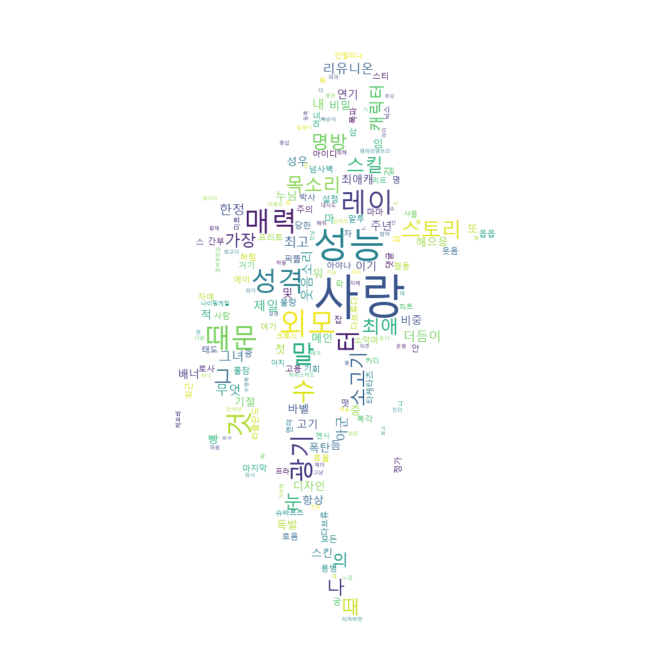

In [149]:
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#save wordcloud image
wc.to_file('w_word.png')